In [14]:
import sqlite3
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import moyal
from collections import Counter
from utils import *
from plotting_tools import *
import os
#%matplotlib qt5
mpl.rc("figure", dpi=300)
plt.rcParams["font.size"] =   20.0
colors = ['#0088EE', '#66CC00', '#6600CC', '#CC6600', '#00CCCC', '#CC0000', '#CC00CC', '#FFEE00', '#00CC00', '#0000CC', '#00CC66', '#CC0066', '#A3FF47', '#850AFF', '#85FF0A', '#A347FF']

In [39]:
db_file = '../data_20250305_144002_kicker_test.dat'

#'../data_20250213_173104_newSiPM_synthetic.dat'

#'../data_20250305_131722_pedestal.dat'

conn = connect_to_db(db_file)
df_pedestal = create_df(conn)

In [40]:
nsamples = 64
eight_channel = False

In [41]:
adc_split_array_pedestal = get_adc_split_array(df_pedestal, eight_channel=eight_channel, by_bunch_count=False, new_format=True, ror_length=nsamples)

In [30]:
adc_to_Q(np.array([5]))

array([17.05])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1.93e+03, 1.57e+03, 1.88e+03, 1.55e+03, ..., 2.09e+03, 2.11e+03, 1.76e+03]
[1.7e+03, 1.53e+03, 1.54e+03, 1.55e+03, ..., 1.34e+03, 1.6e+03, 1.87e+03]
[2.33e+03, 1.61e+03, 1.94e+03, 1.74e+03, ..., 1.98e+03, 1.88e+03, 1.92e+03]
[1.52e+03, 1.58e+03, 1.51e+03, 1.5e+03, ..., 1.61e+03, 1.4e+03, 1.61e+03]
[3.46e+03, 2.79e+03, 2.46e+03, 2.37e+03, ..., 2.3e+03, 2.78e+03, 3.08e+03]
[2.67e+03, 1.94e+03, 2.37e+03, 2.14e+03, ..., 2.68e+03, 2.39e+03, 2.32e+03]
[1.87e+03, 1.92e+03, 1.6e+03, 1.52e+03, ..., 2.04e+03, 1.75e+03, 1.39e+03]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1.44e+03, 2.13e+03, 1.69e+03, 1.78e+03, ..., 1.52e+03, 1.78e+03, 1.85e+03]
[2.2e+03, 1.76e+03, 1.61e+03, 1.53e+03, ..., 1.91e+03, 1.89e+03, 1.9e+03]
[1.67e+03, 1.94e+03, 2.05e+03, 2e+03, ..., 2.14e+03, 2.27e+03, 1.87e+03]
[1.88e+03, 2.31e+03, 2.55e+03, 1.96e+03, ..., 2.12e+03, 1.92e+03, 1.96e+03]
[1.92e+03, 2.51e+03, 1.91e+03, 1.97e+03, ..., 1.95e+03, 1.95e+03, 2.34e+03]


UnboundLocalError: local variable 'fig2' referenced before assignment

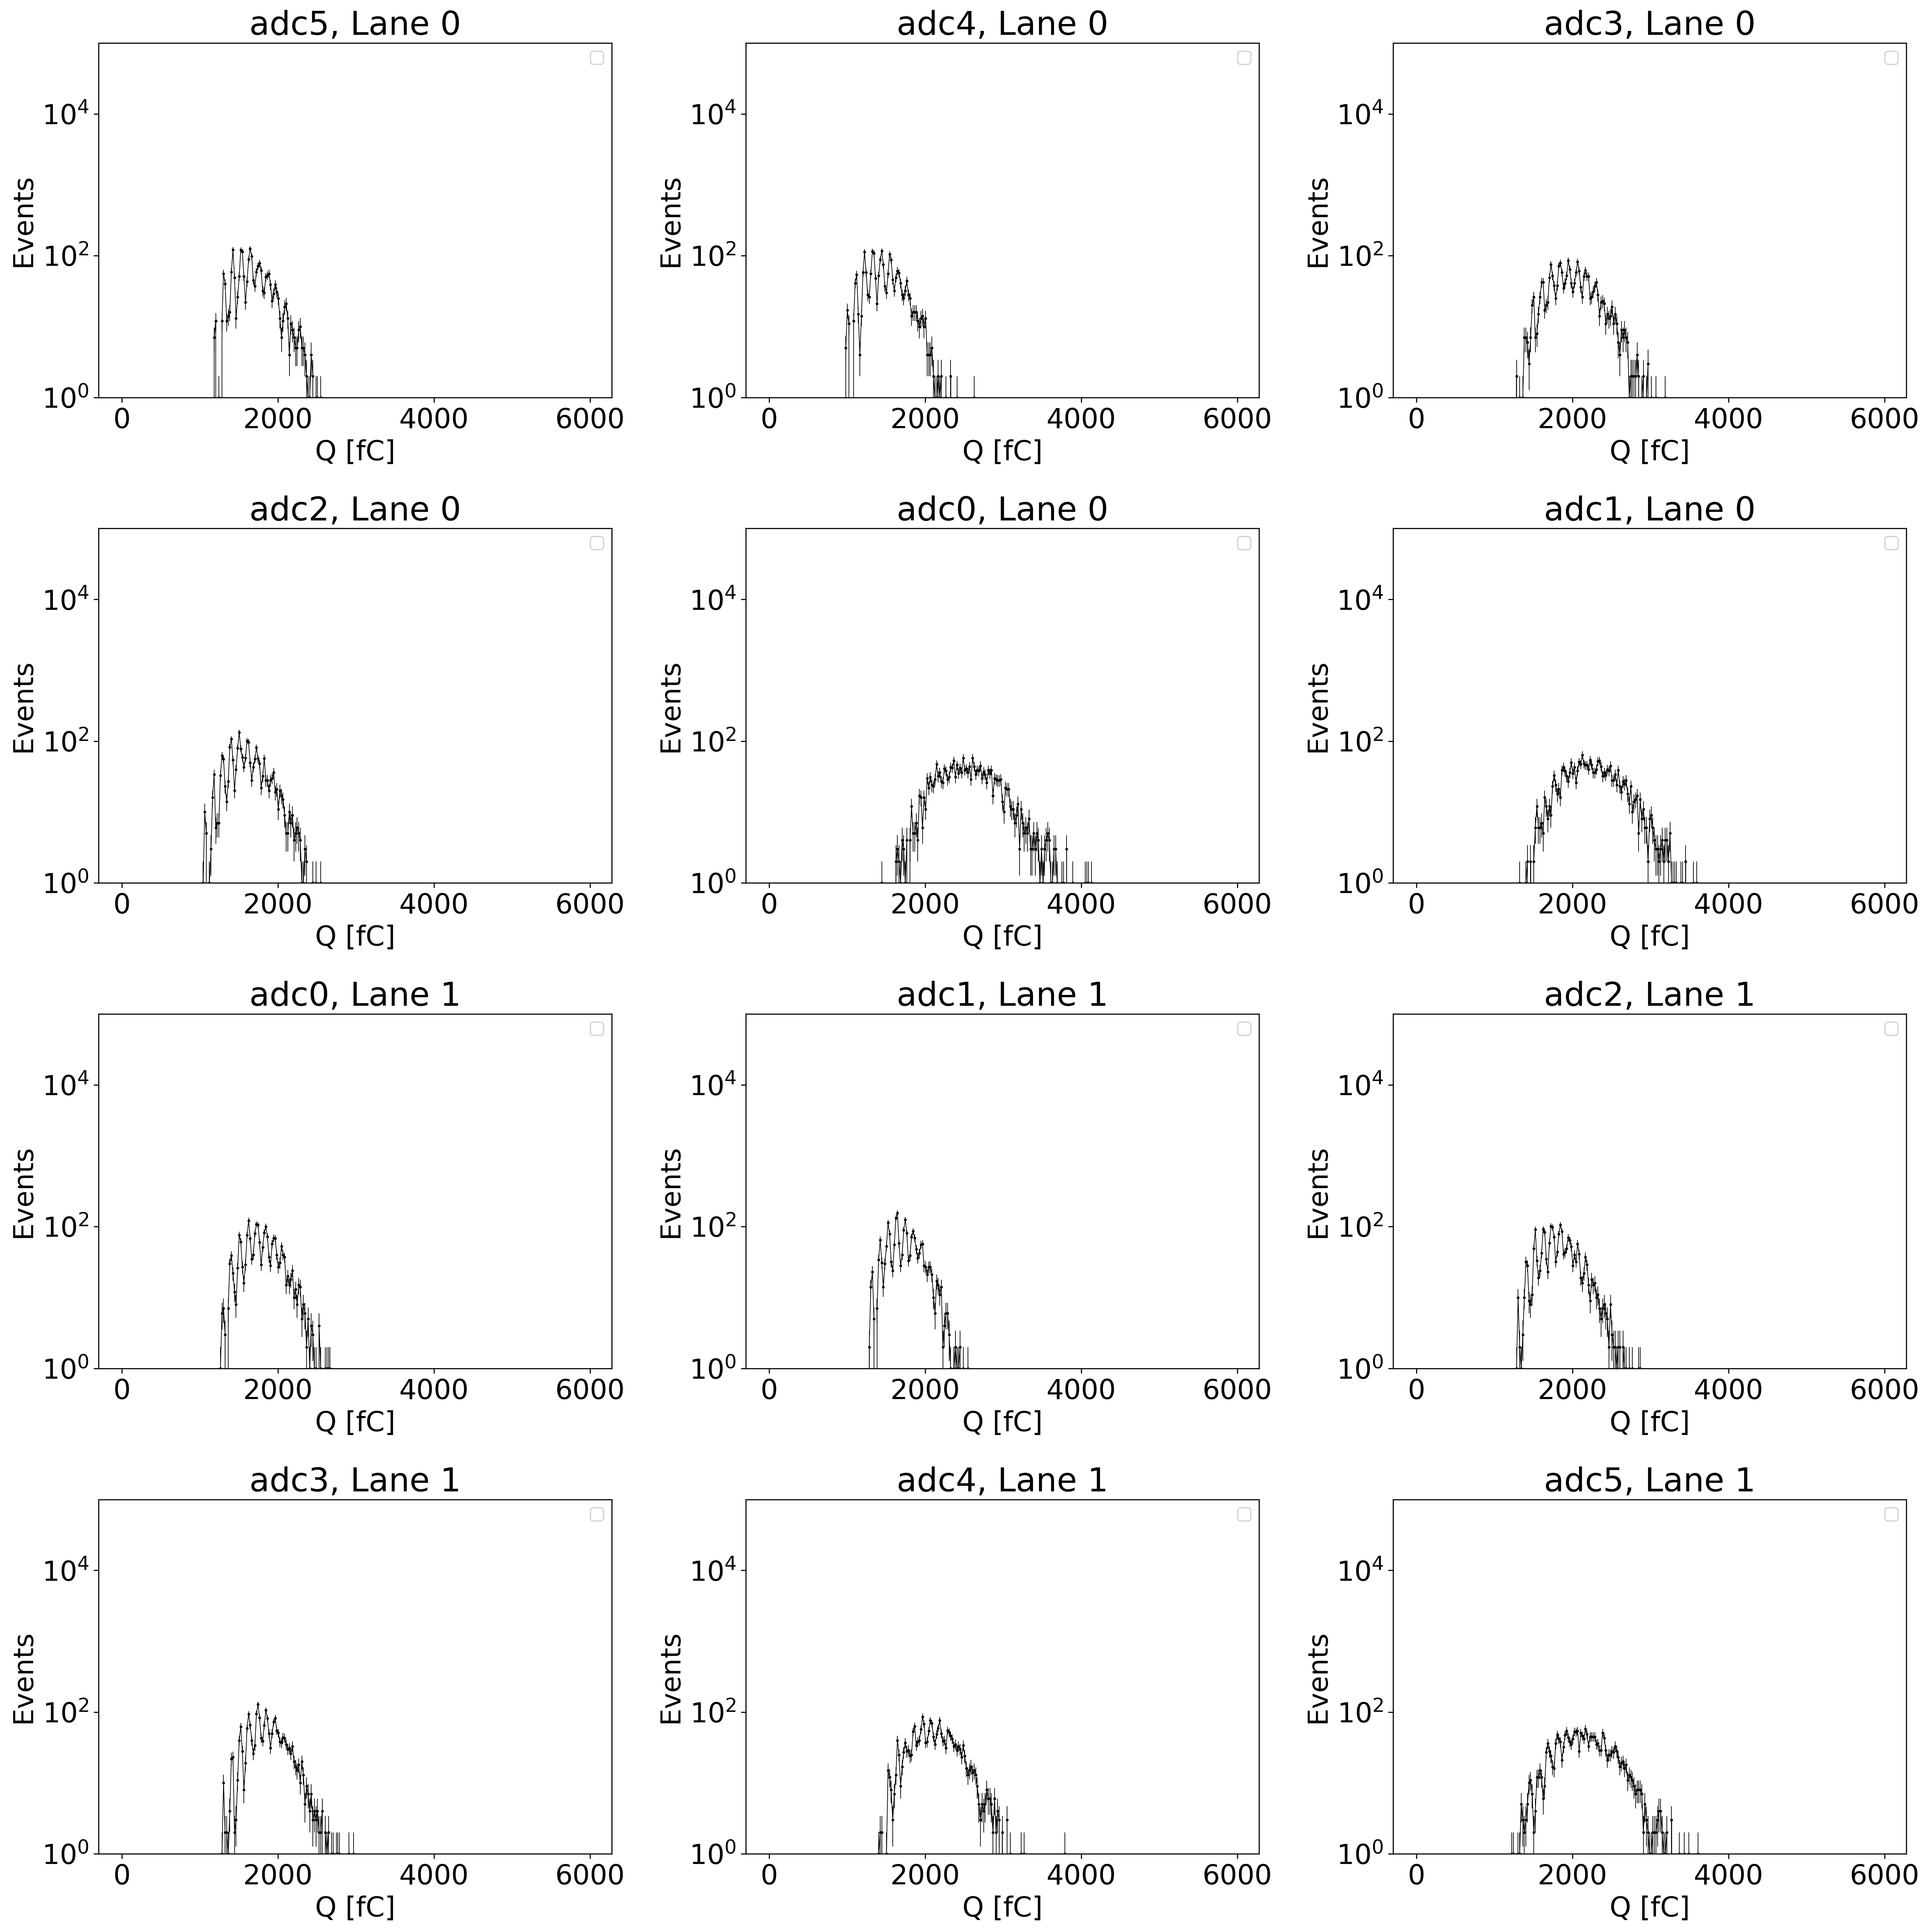

In [42]:
gain_list, pedestal_list = get_gain(adc_split_array_pedestal, get_gain=False, eight_channel=eight_channel, nsamples=nsamples, new_format=True, by_bunch_count=False, gain_list = None, pedestal_list = None, n_peaks=3)

In [6]:
db_files_external_trigger_test = ['../data_20250213_173658_ext_trig_new_SiPM_52V.dat']

#data_20250213_173658_ext_trig_new_SiPM_52V
conns_external_trigger_test = []
for file in db_files_external_trigger_test:
    conns_external_trigger_test.append(connect_to_db(file))
df_full_conns_external_trigger_test = create_df_combo(conns_external_trigger_test)
df_trigger_full_conns_external_trigger_test = create_trigger_df_combo(conns_external_trigger_test)

In [7]:
adc_split_array_external_trigger = get_adc_split_array(df_full_conns_external_trigger_test, False, False, True, 64)

5 0 4.20910456725634 0.9399970028177922
4 0 5.437095841788691 0.7544098636865609
3 0 5.109857636326023 0.9381418309084252
2 0 5.432937558516956 0.754674110771127
0 0 5.220706441029448 0.9006539293398503
1 0 5.37849380427197 0.8350509018431308
0 1 5.232305481804972 1.0569669914288118
1 1 4.665272812065788 0.8085902762849809
2 1 3.9348045132781926 0.7608506308536533
3 1 5.085873080929288 0.7881271121399646
4 1 3.748615000622828 0.7998730936905752
5 1 4.815538543107779 0.739977364136147


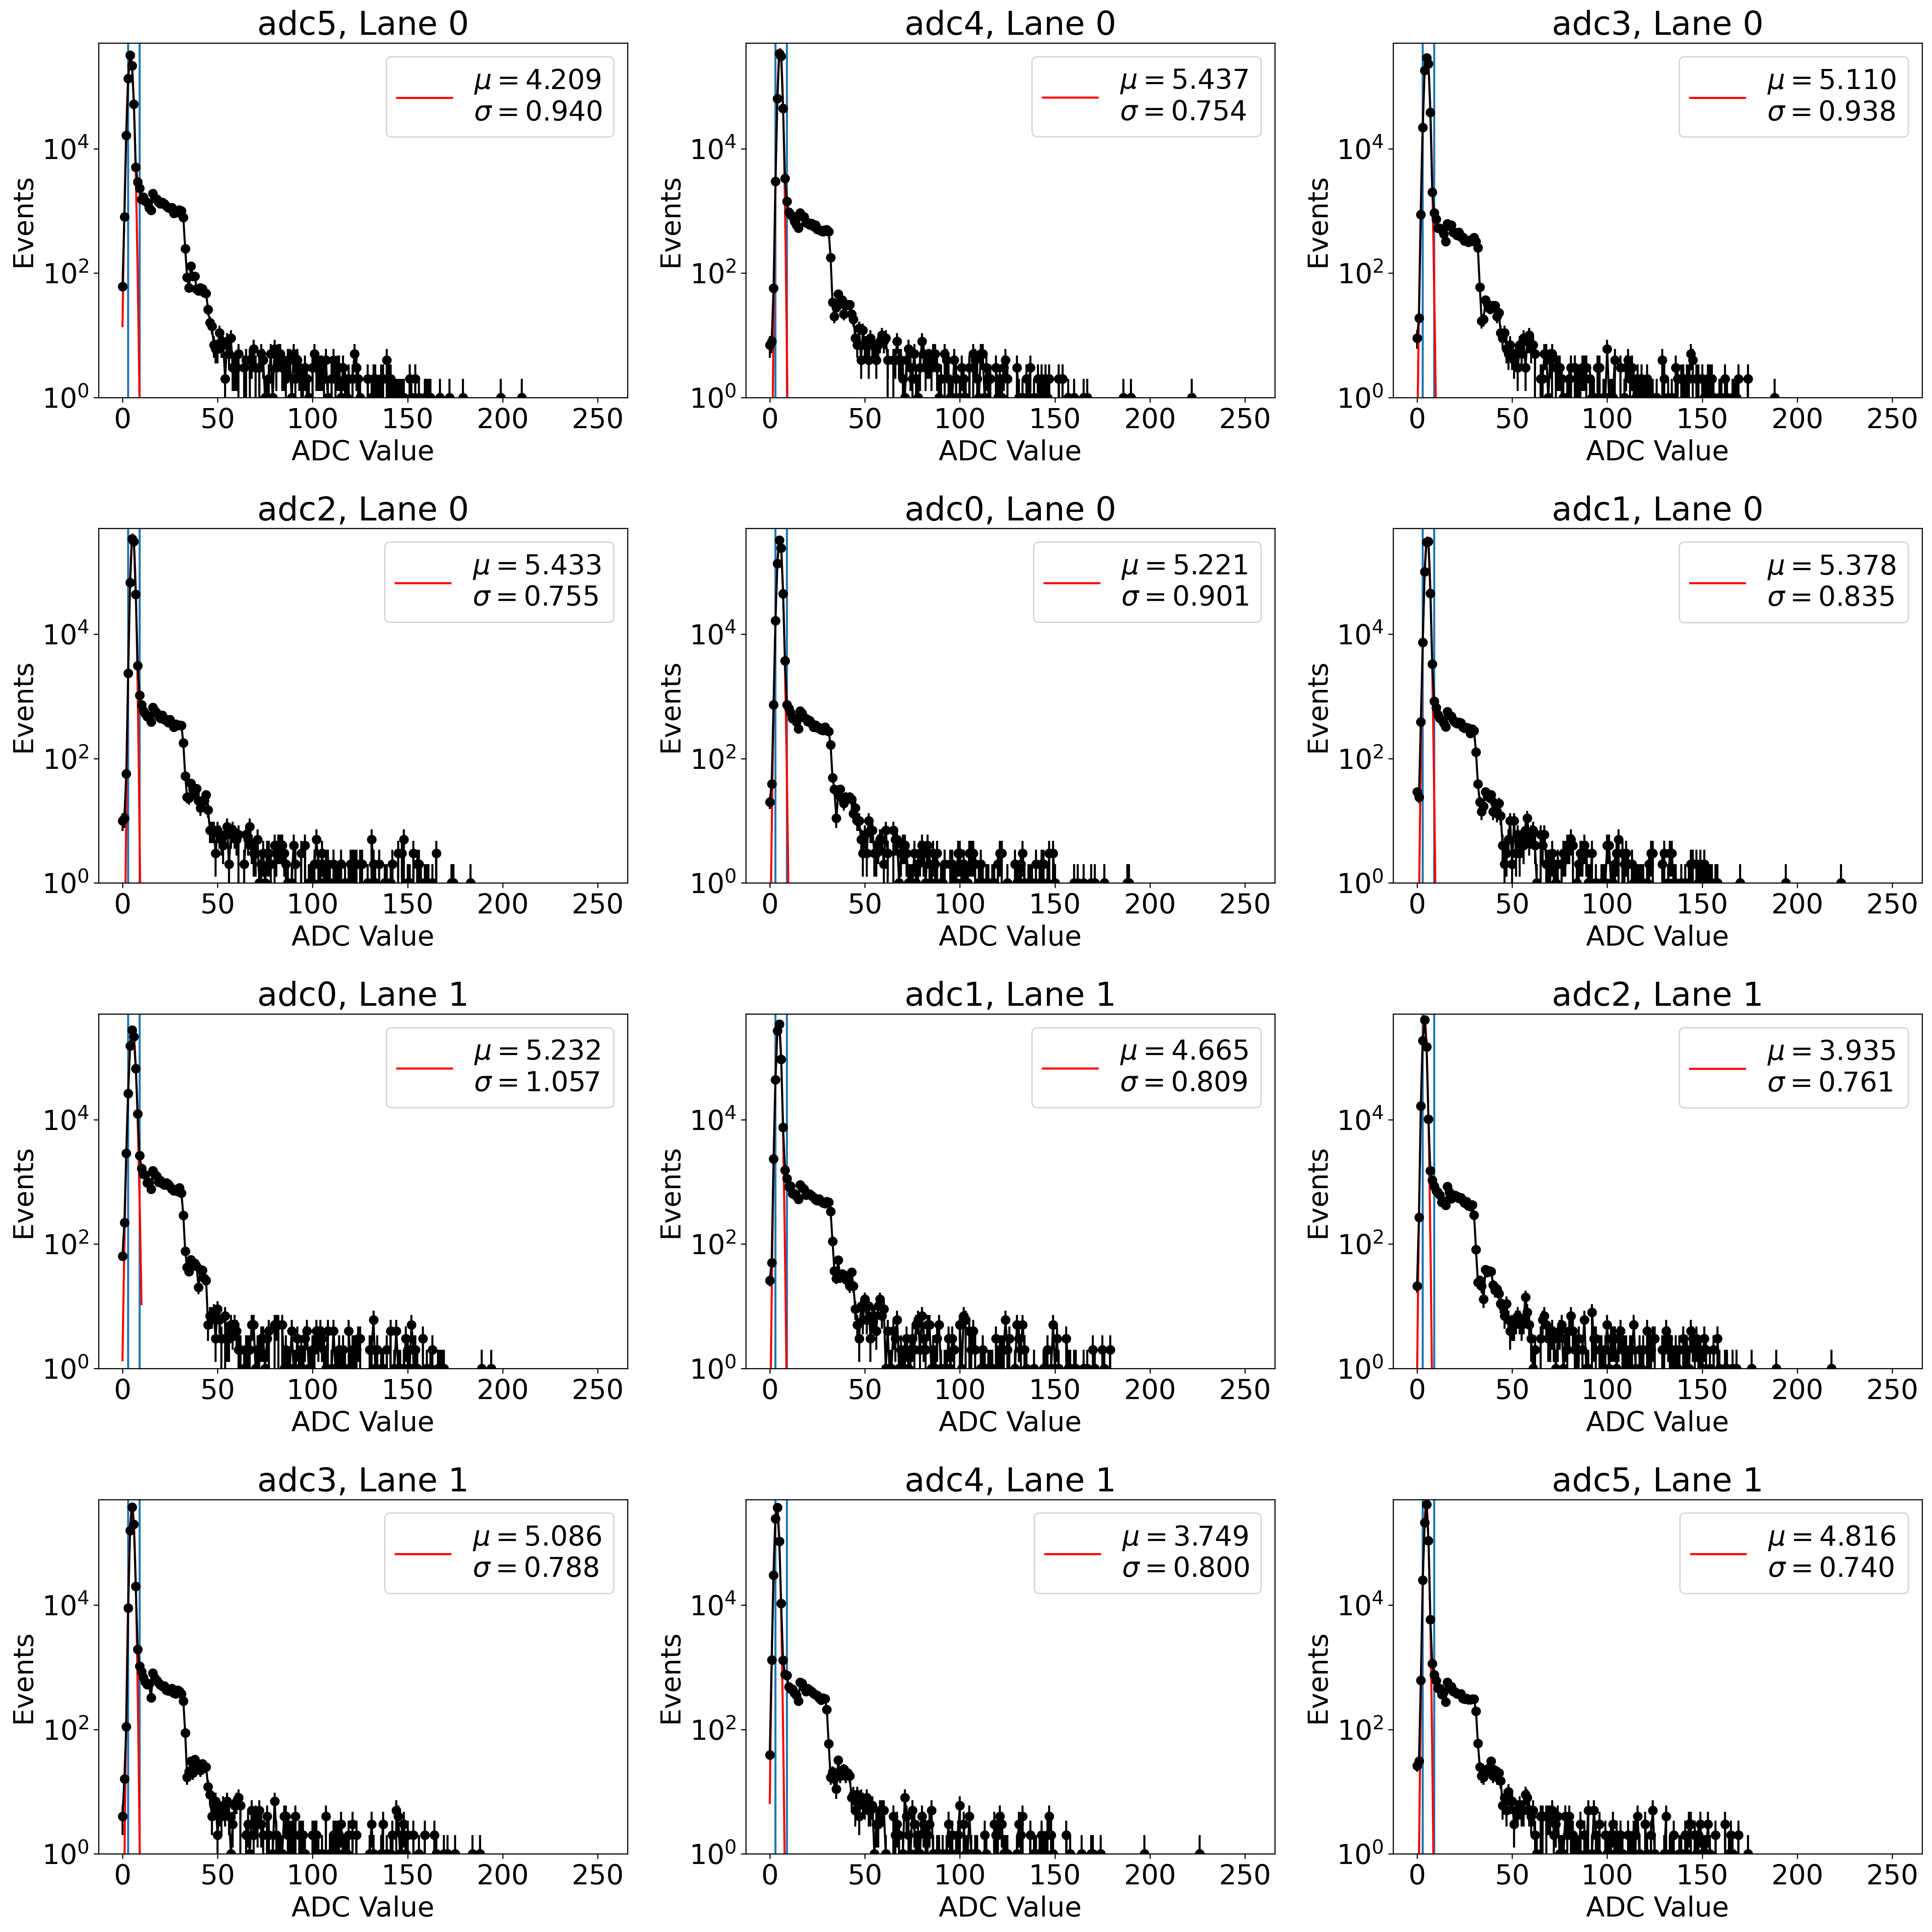

In [8]:
plot_adcs_lanes(df_full_conns_external_trigger_test, eight_channel = False)

0
1
2
3
4
5
6
7
8
9
10
11
11891
11891
11891
11891
11891
11891
11891
11891
11891
11891
11891
11891


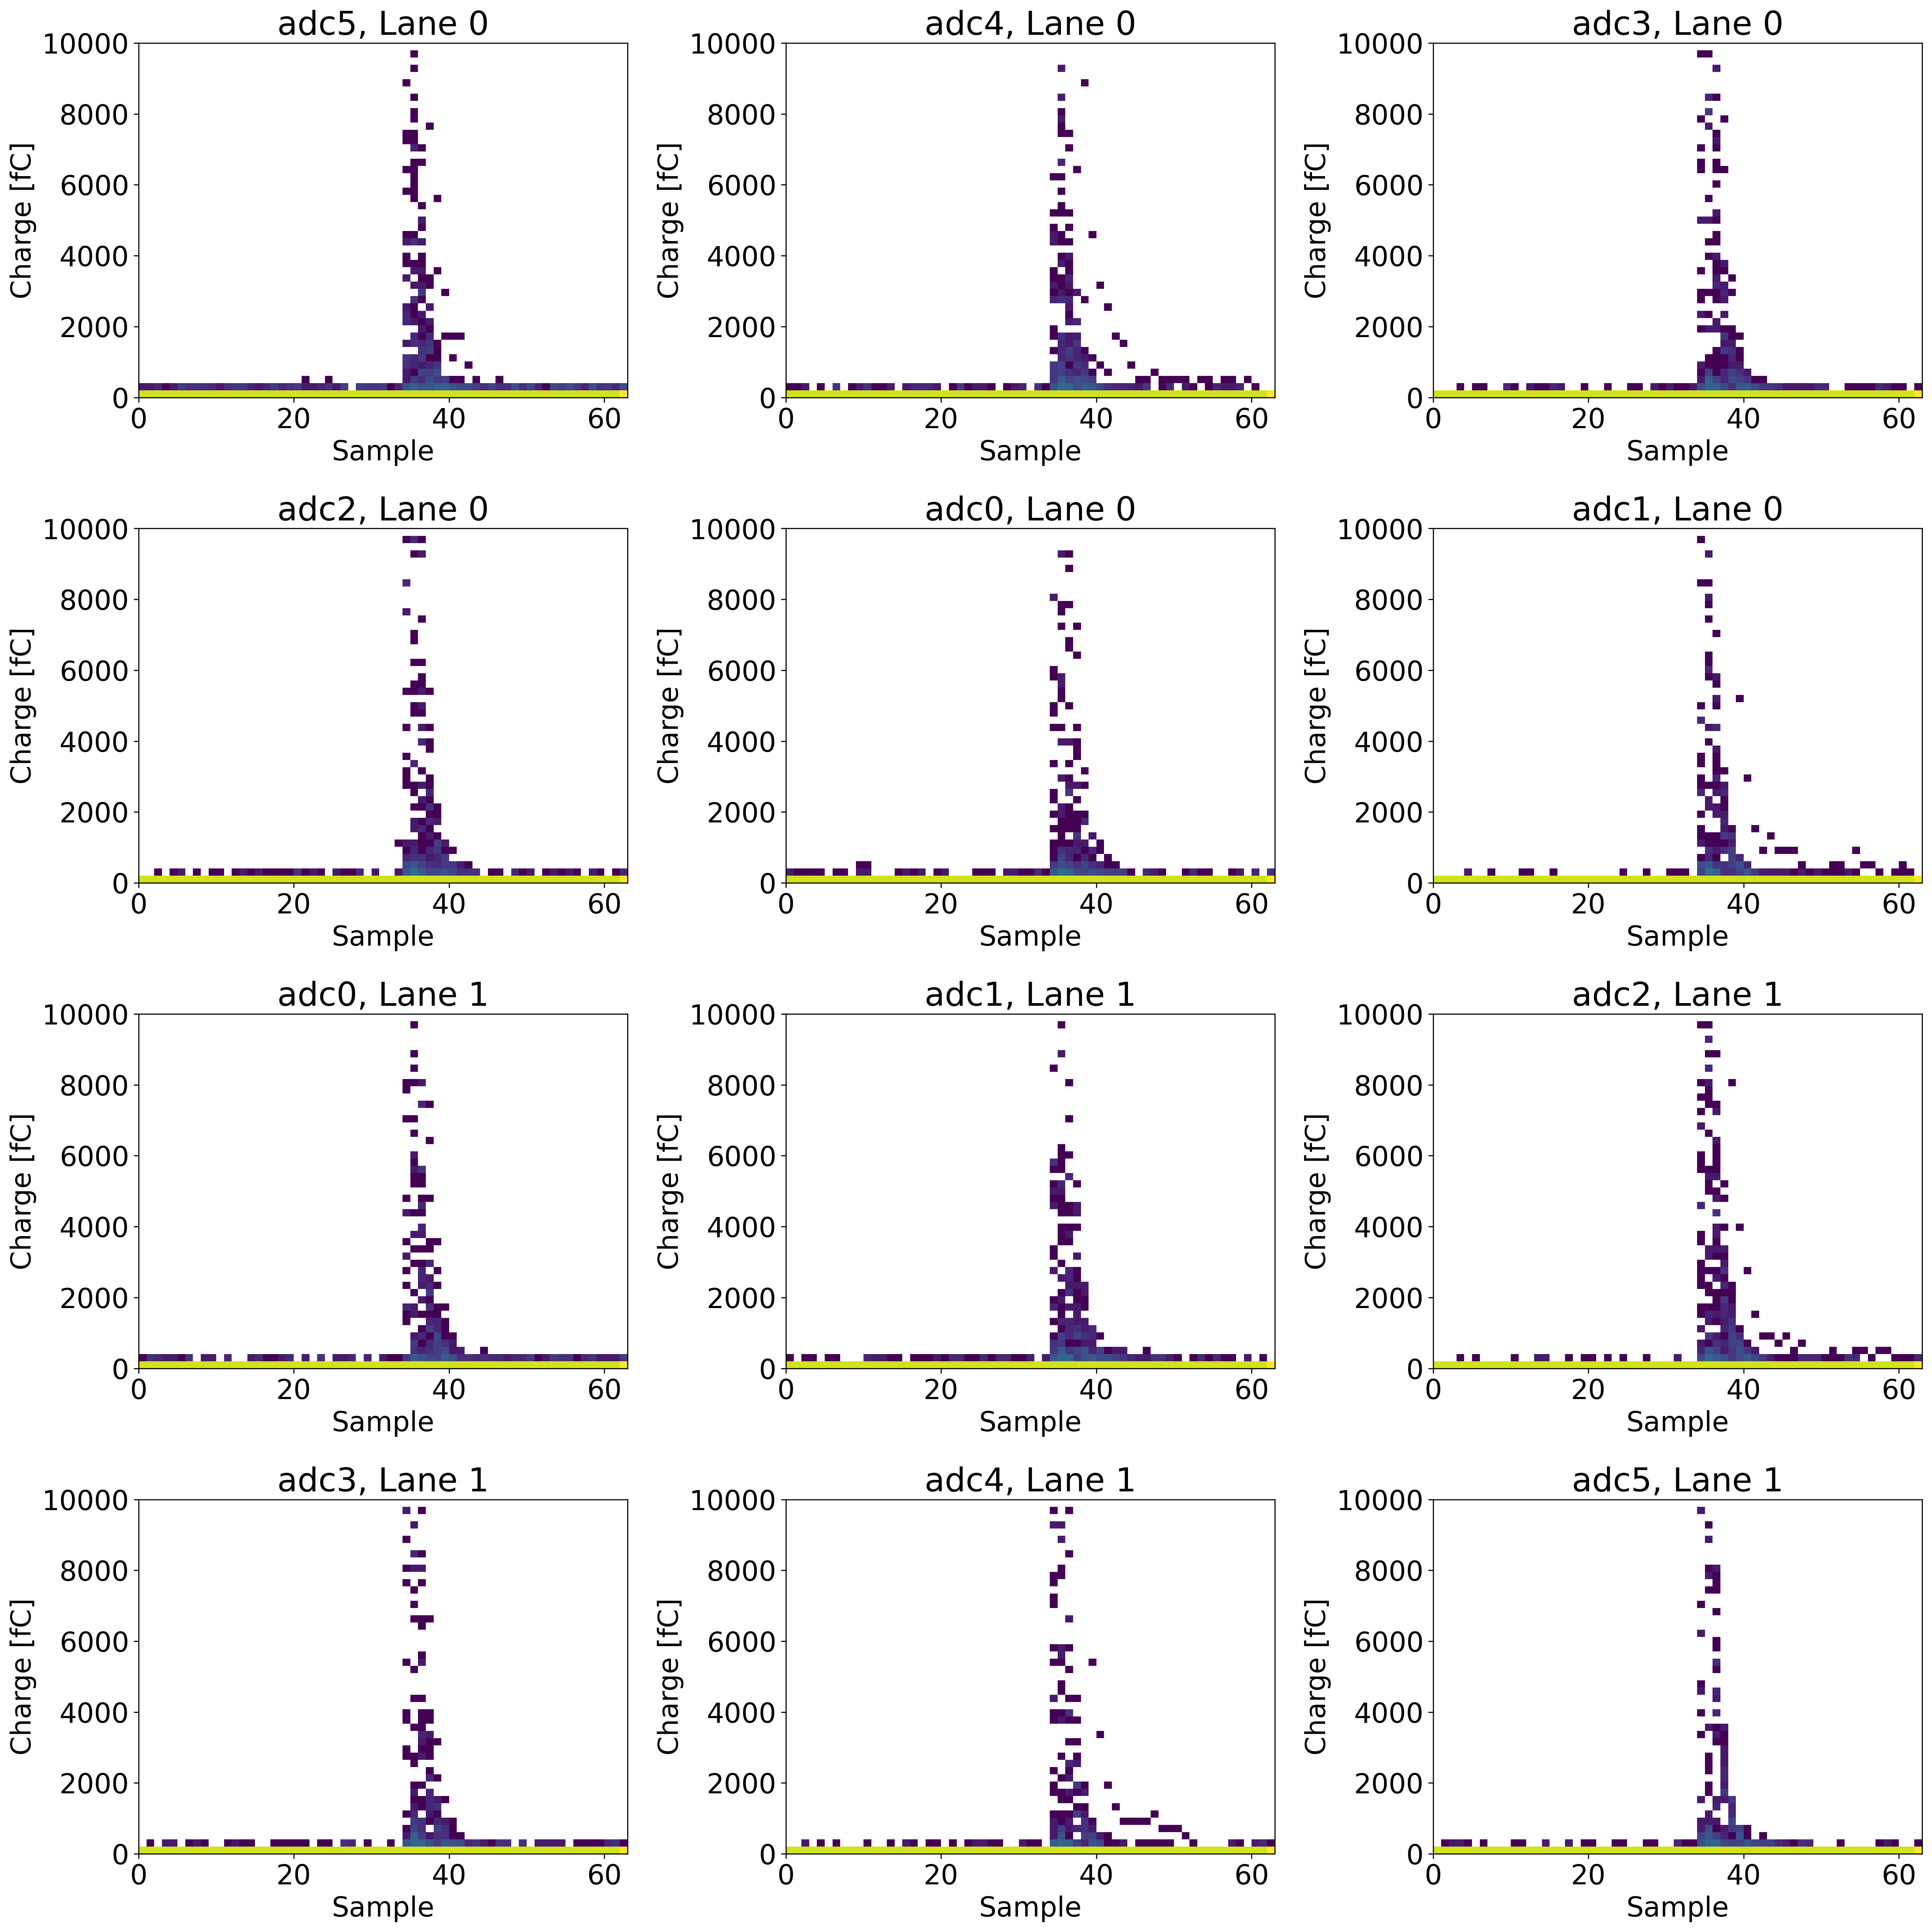

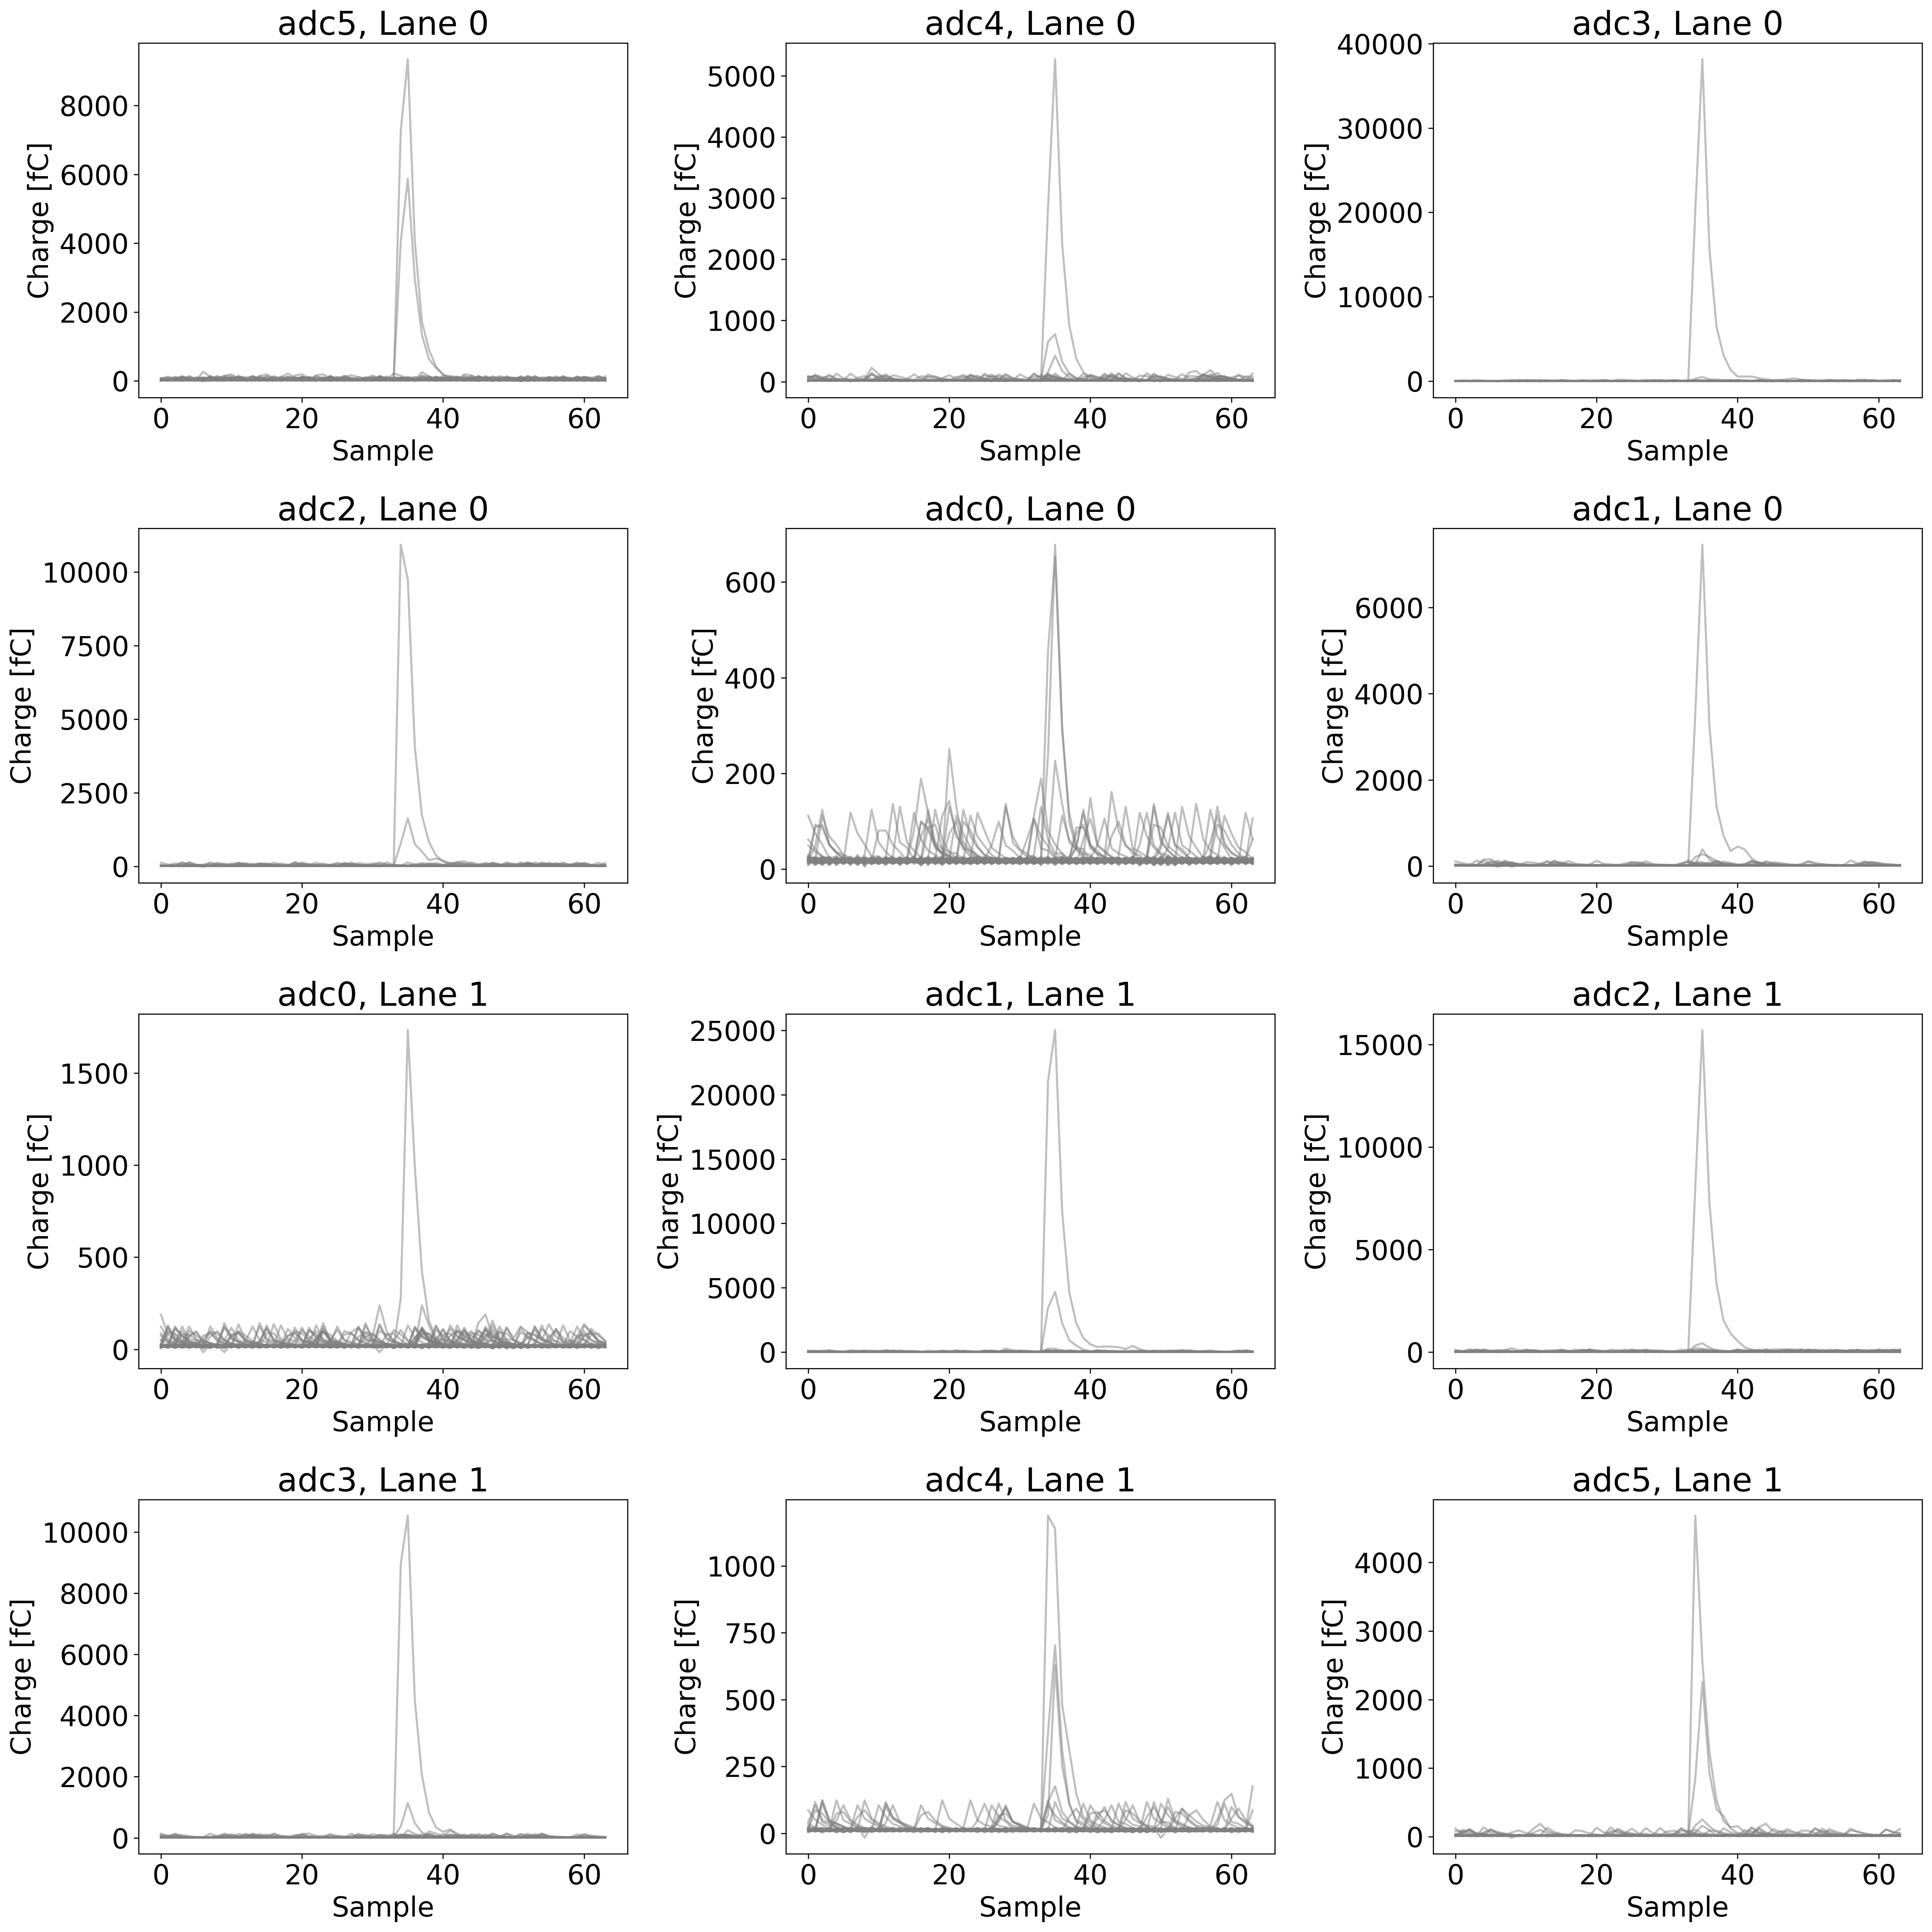

In [9]:
plot_charge_v_samples(adc_split_array_external_trigger, threshold = 0, eight_channel=eight_channel, new_format=True, nsamples=nsamples, by_bunch_count=False, trig_samp = 0, ror_length=nsamples)


[1.12, 2.07, 0.16, 0.995, 0.0238, ..., -0.127, 1.94, 0.965, 0.0841, 3.54]
[0.962, 0.0299, 0.19, -0.00203, -0.034, ..., 1.02, 1.05, 0.158, 3.13, 0.0618]
[0.111, 1.94, 1.19, 0.993, 0.0649, ..., 0.962, 0.22, 0.189, 0.189, 0.127]
[0.956, 0.159, 0.191, 0.0643, 0.0169, ..., 0.0801, 0.0959, 0.175, 0.0327]
[0.0718, 0.0874, 0.181, 0.103, 0.00948, ..., 0.0407, 0.15, 0.15, 0.181, 0.0718]
[0.0128, 0.0763, 0.124, 0.14, 2.09, ..., -0.00308, 0.0604, 0.108, 0.0287, 0.108]
[1.02, 0.163, 0.211, 1, 0.00474, 0.986, ..., 0.0839, 0.97, 1.19, 0.147, 0.116]
[0.175, 0.175, 0.16, 0.0682, 0.0377, 0.114, ..., 1.3, 1.35, 0.434, 4.4, 0.404]
[0.0881, 0.0566, 1.71, 0.135, -0.0221, ..., 0.0881, 2.19, 1.16, 0.214, 0.0881]
[1.15, 0.177, 0.193, 0.0541, 0.00788, ..., 0.0849, 0.131, 0.223, 0.223, 0.131]
[0.0431, 0.0431, 1.17, 0.0273, 0.0273, ..., 0.0589, 0.201, 3.14, 0.122, 0.265]
[1.07, 0.158, 0.205, 0.0482, -0.0617, 1.02, ..., 1.08, 0.174, 2.3, 0.237, 0.19]


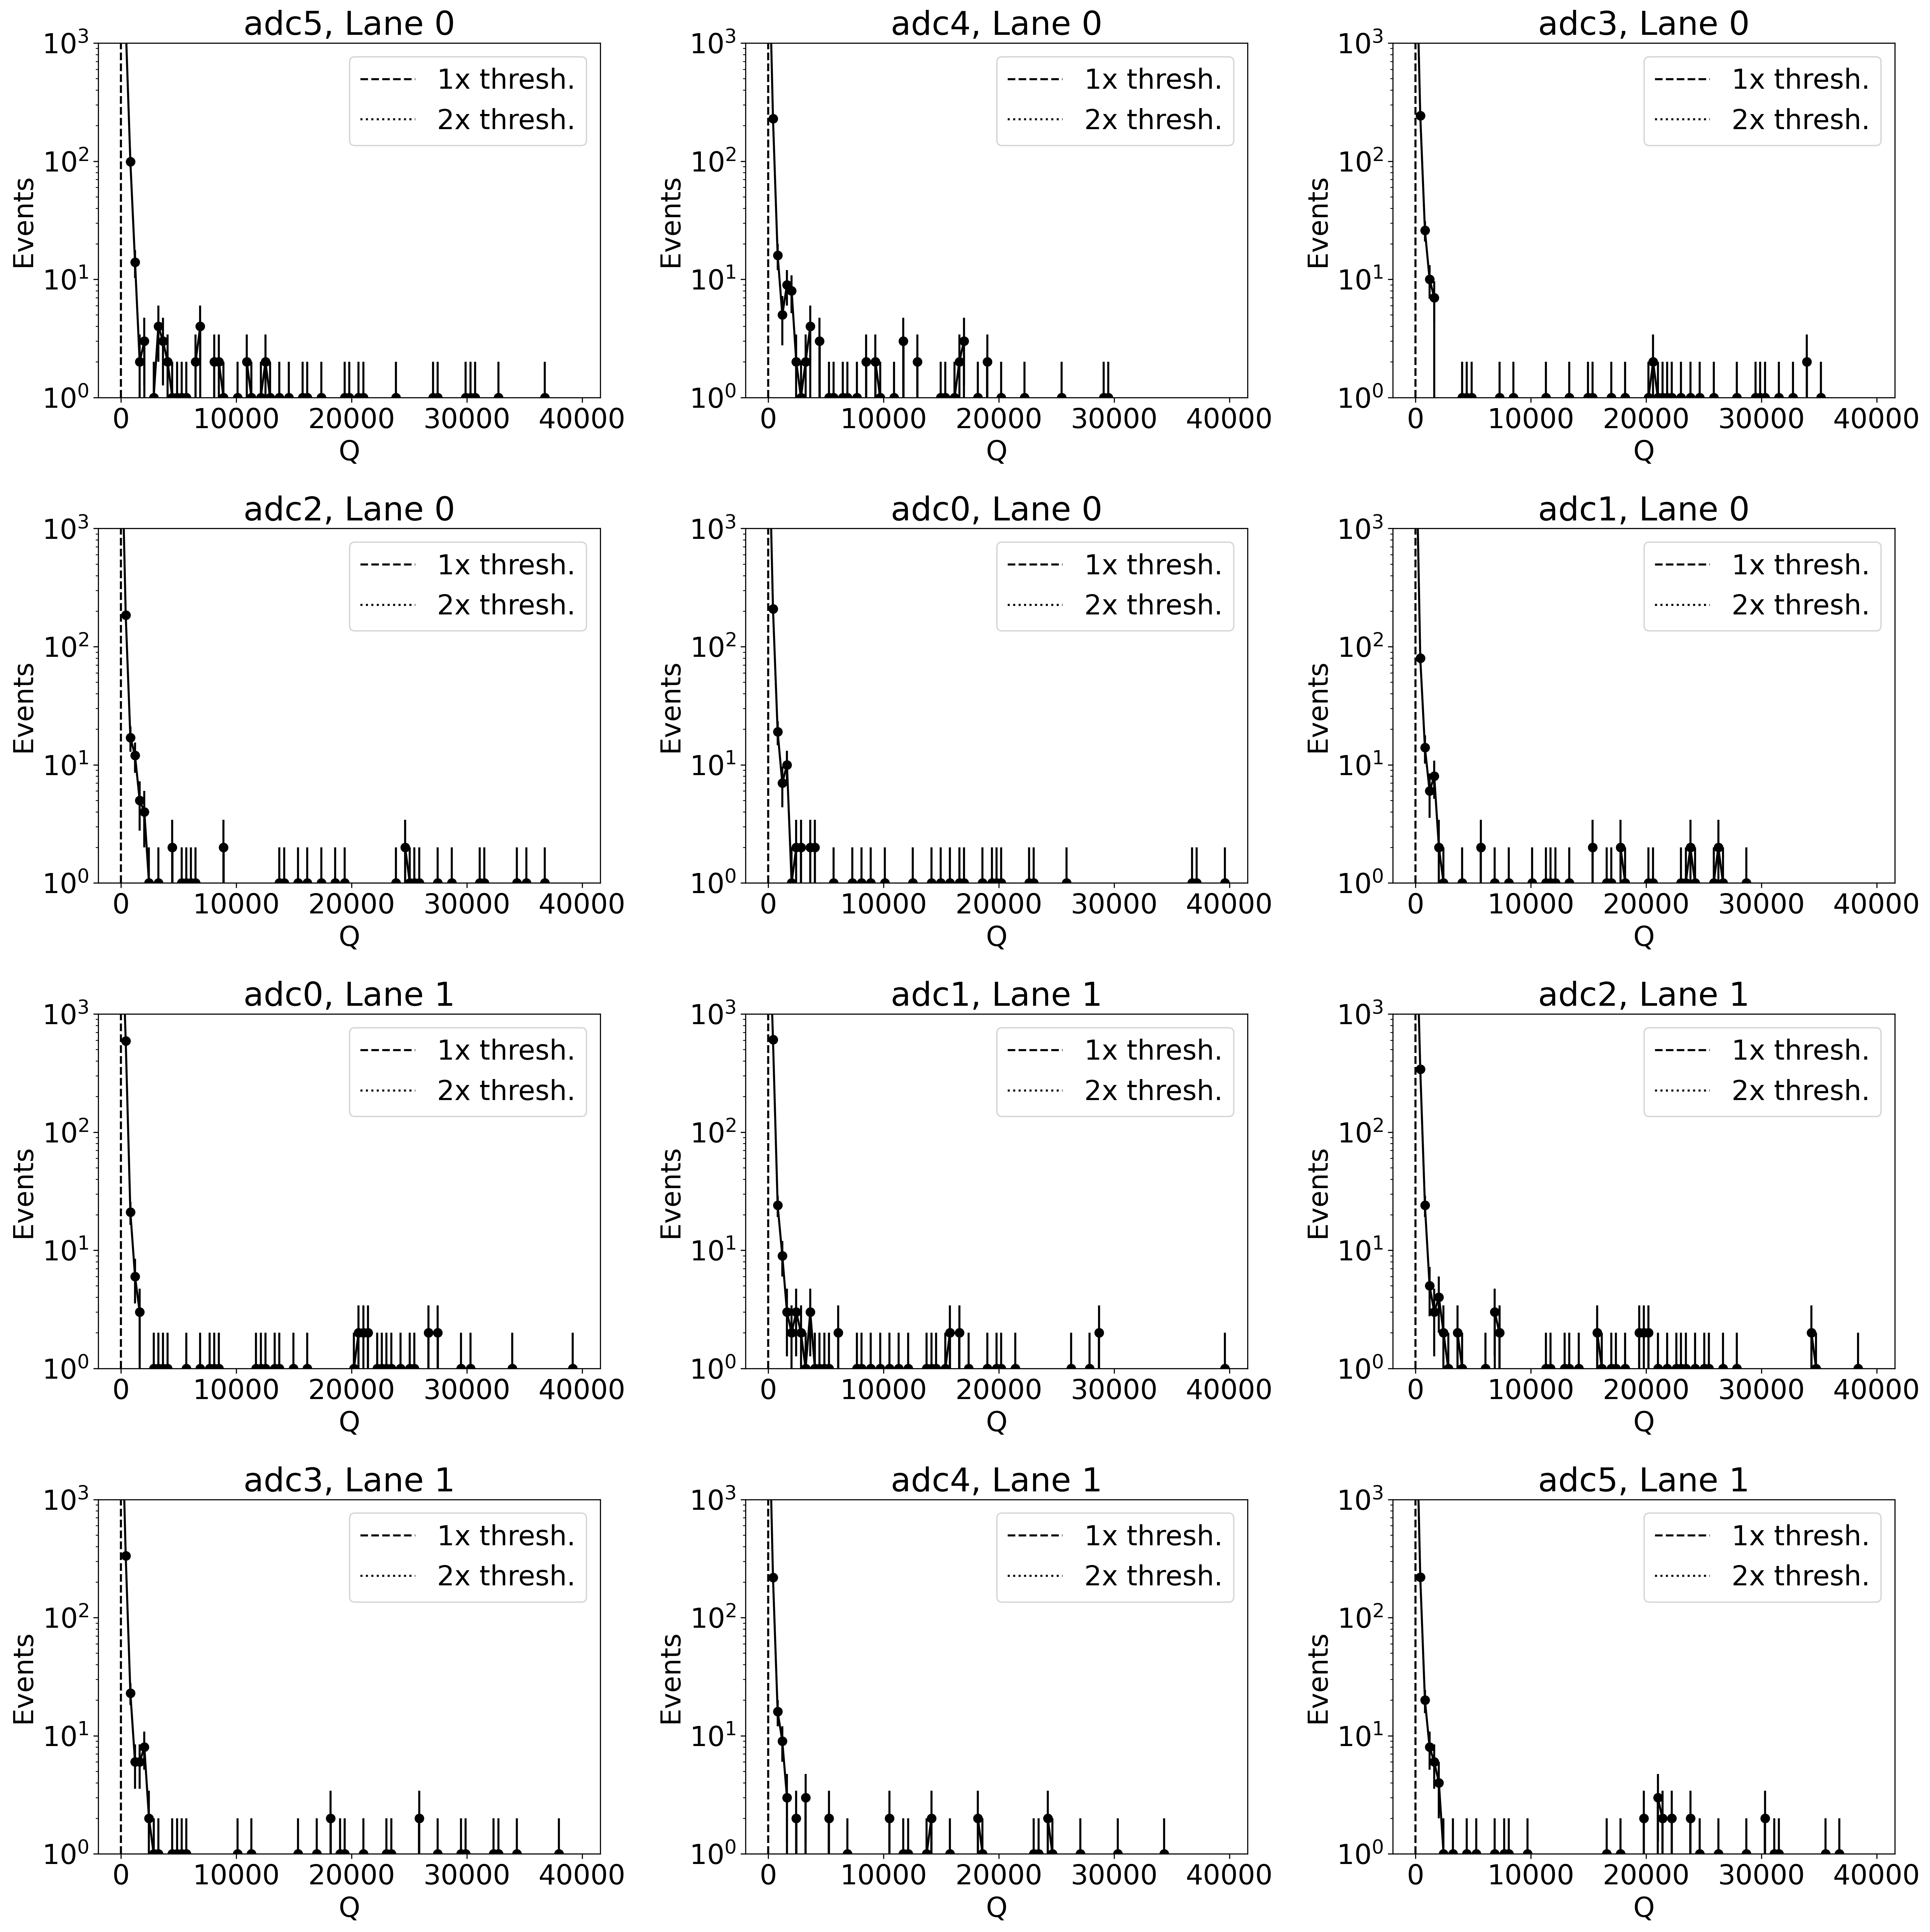

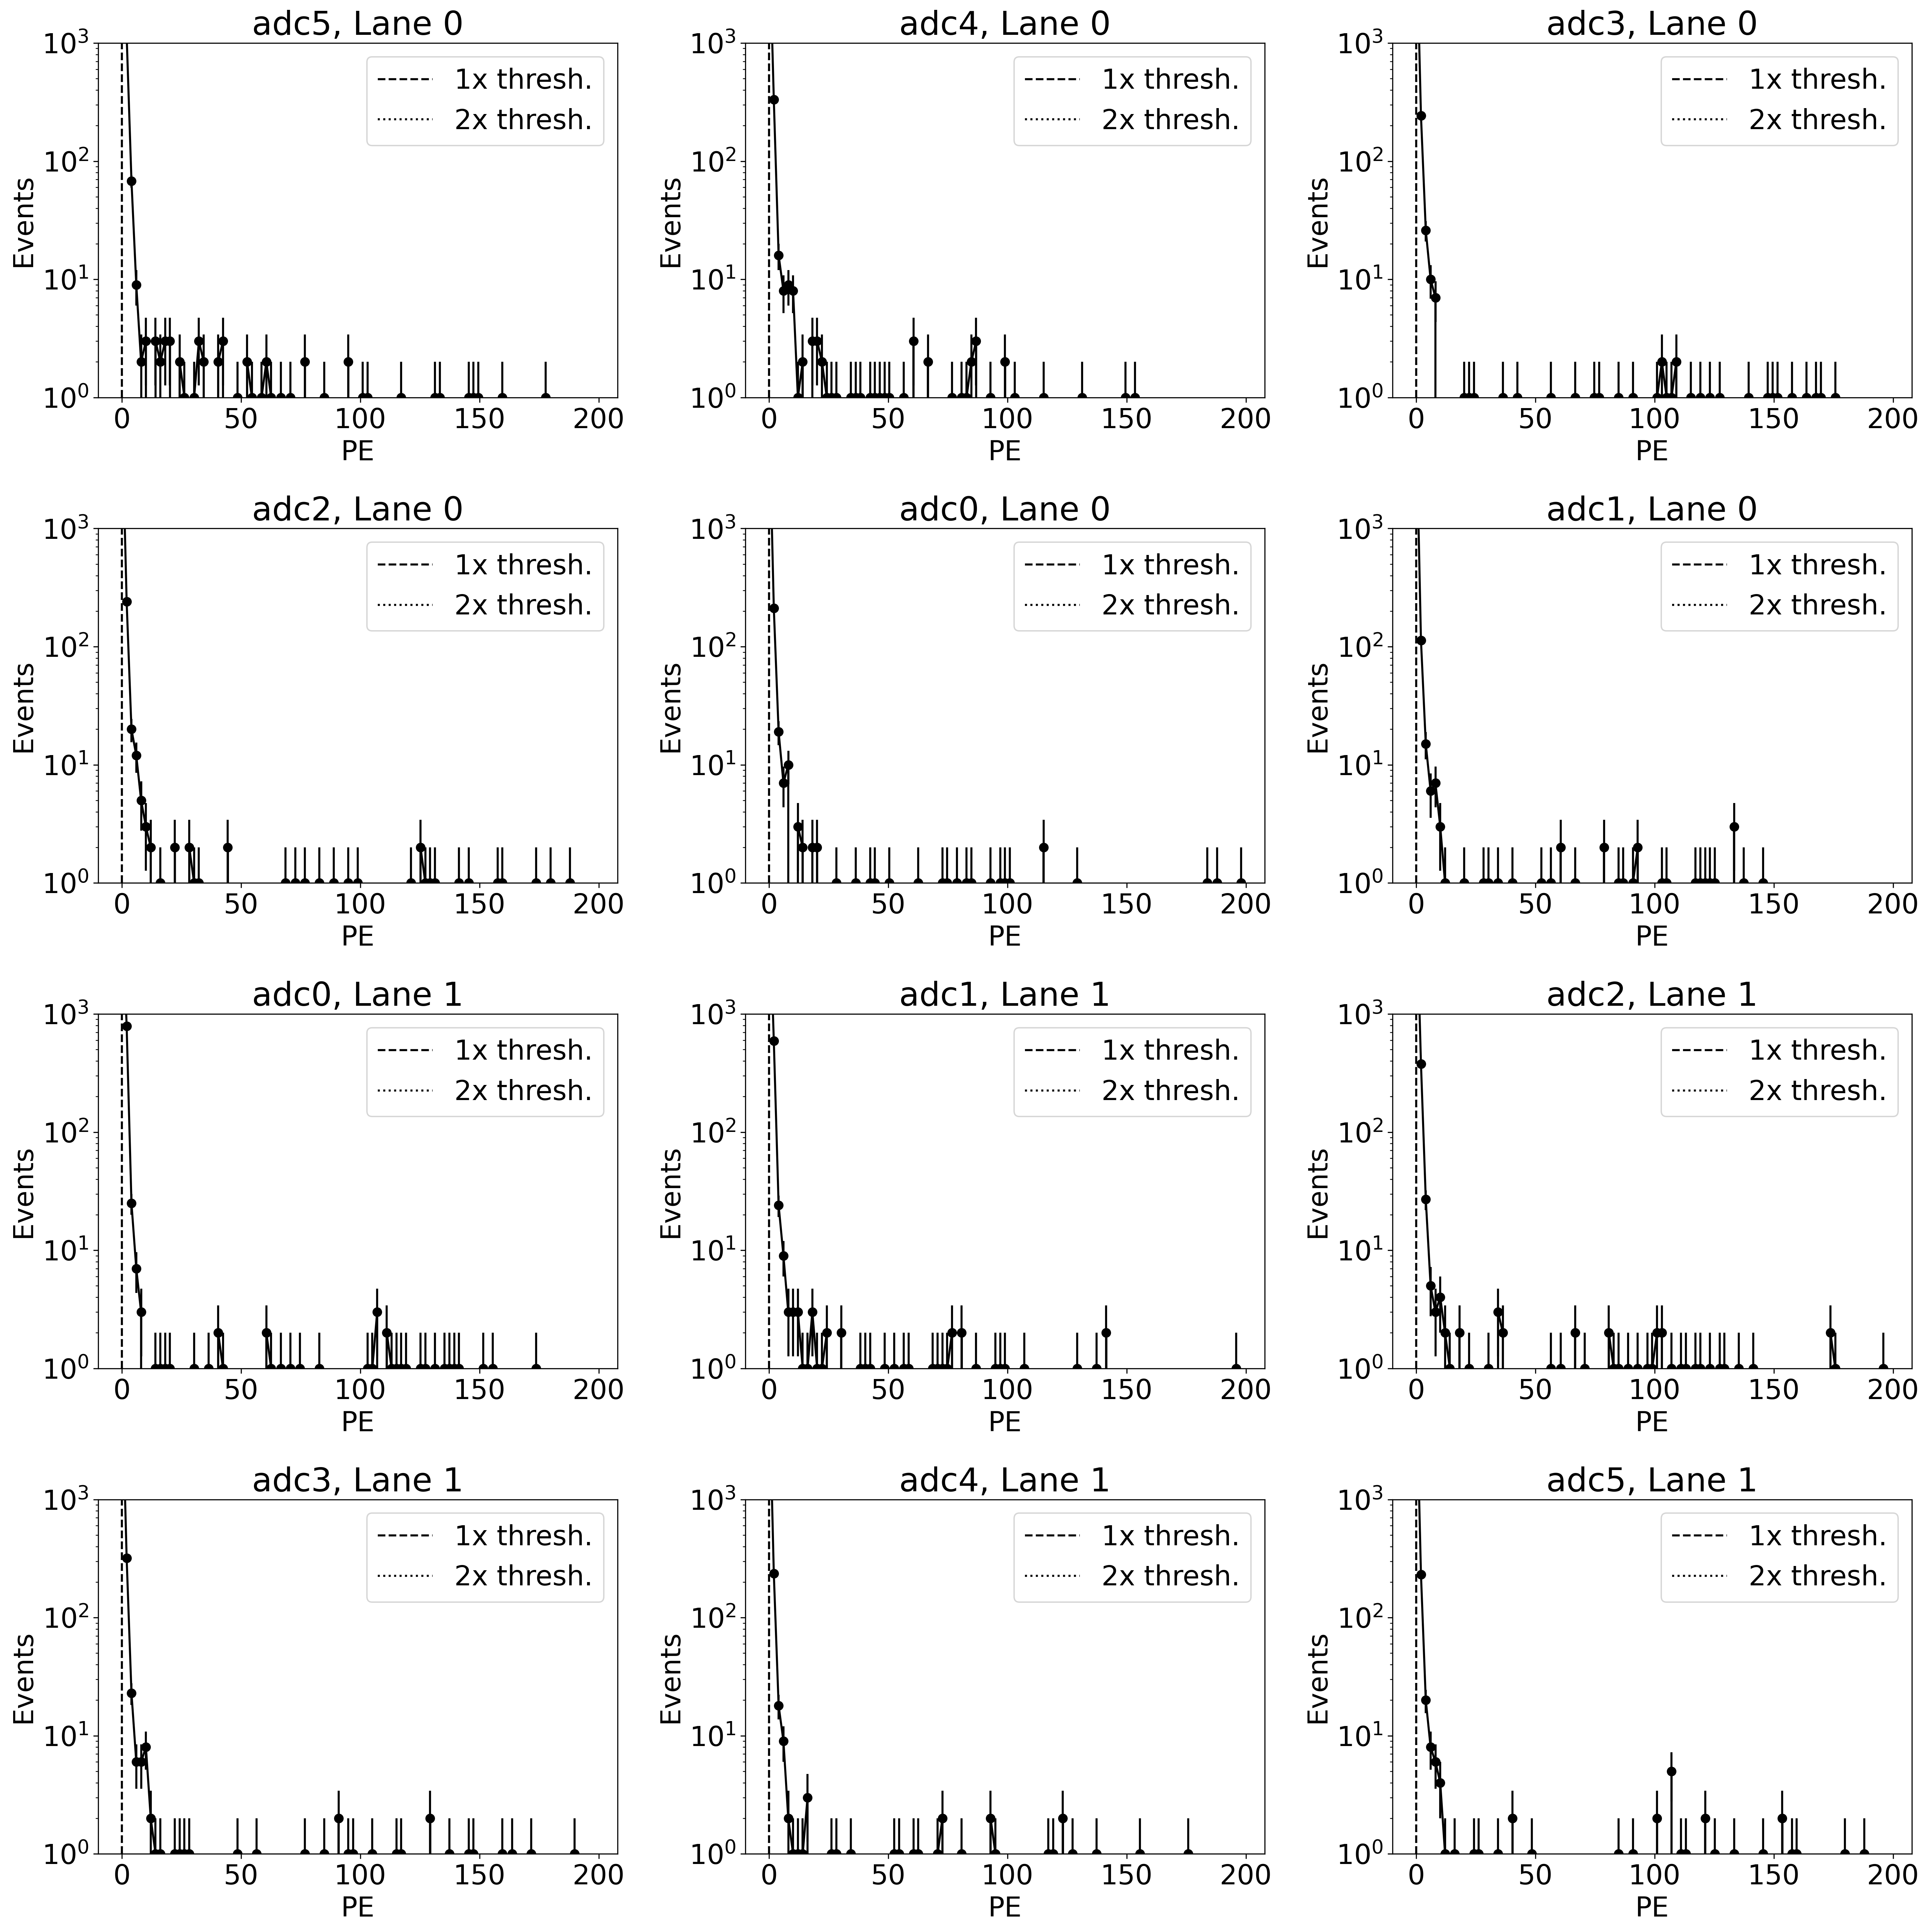

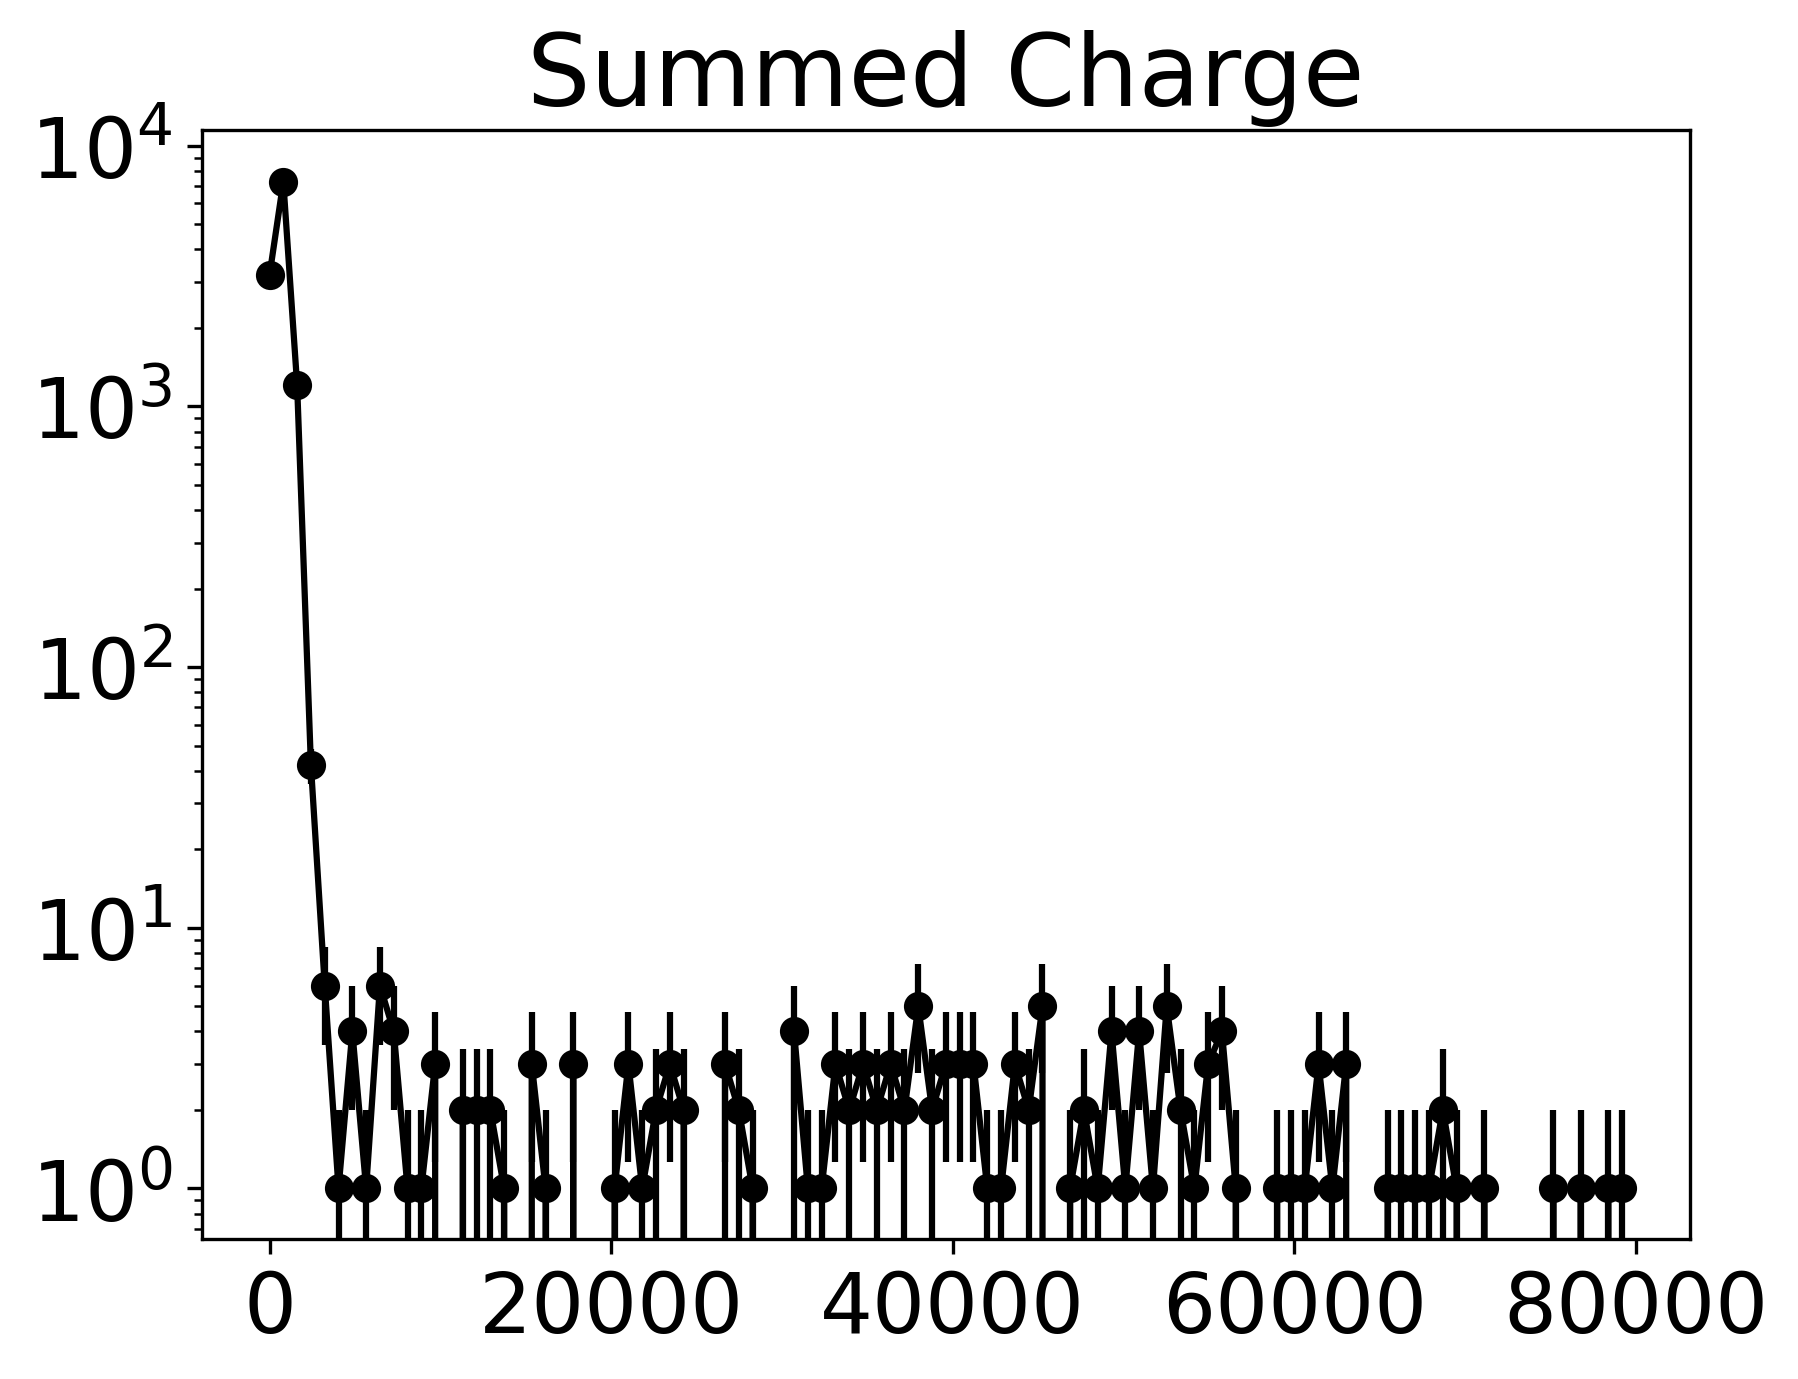

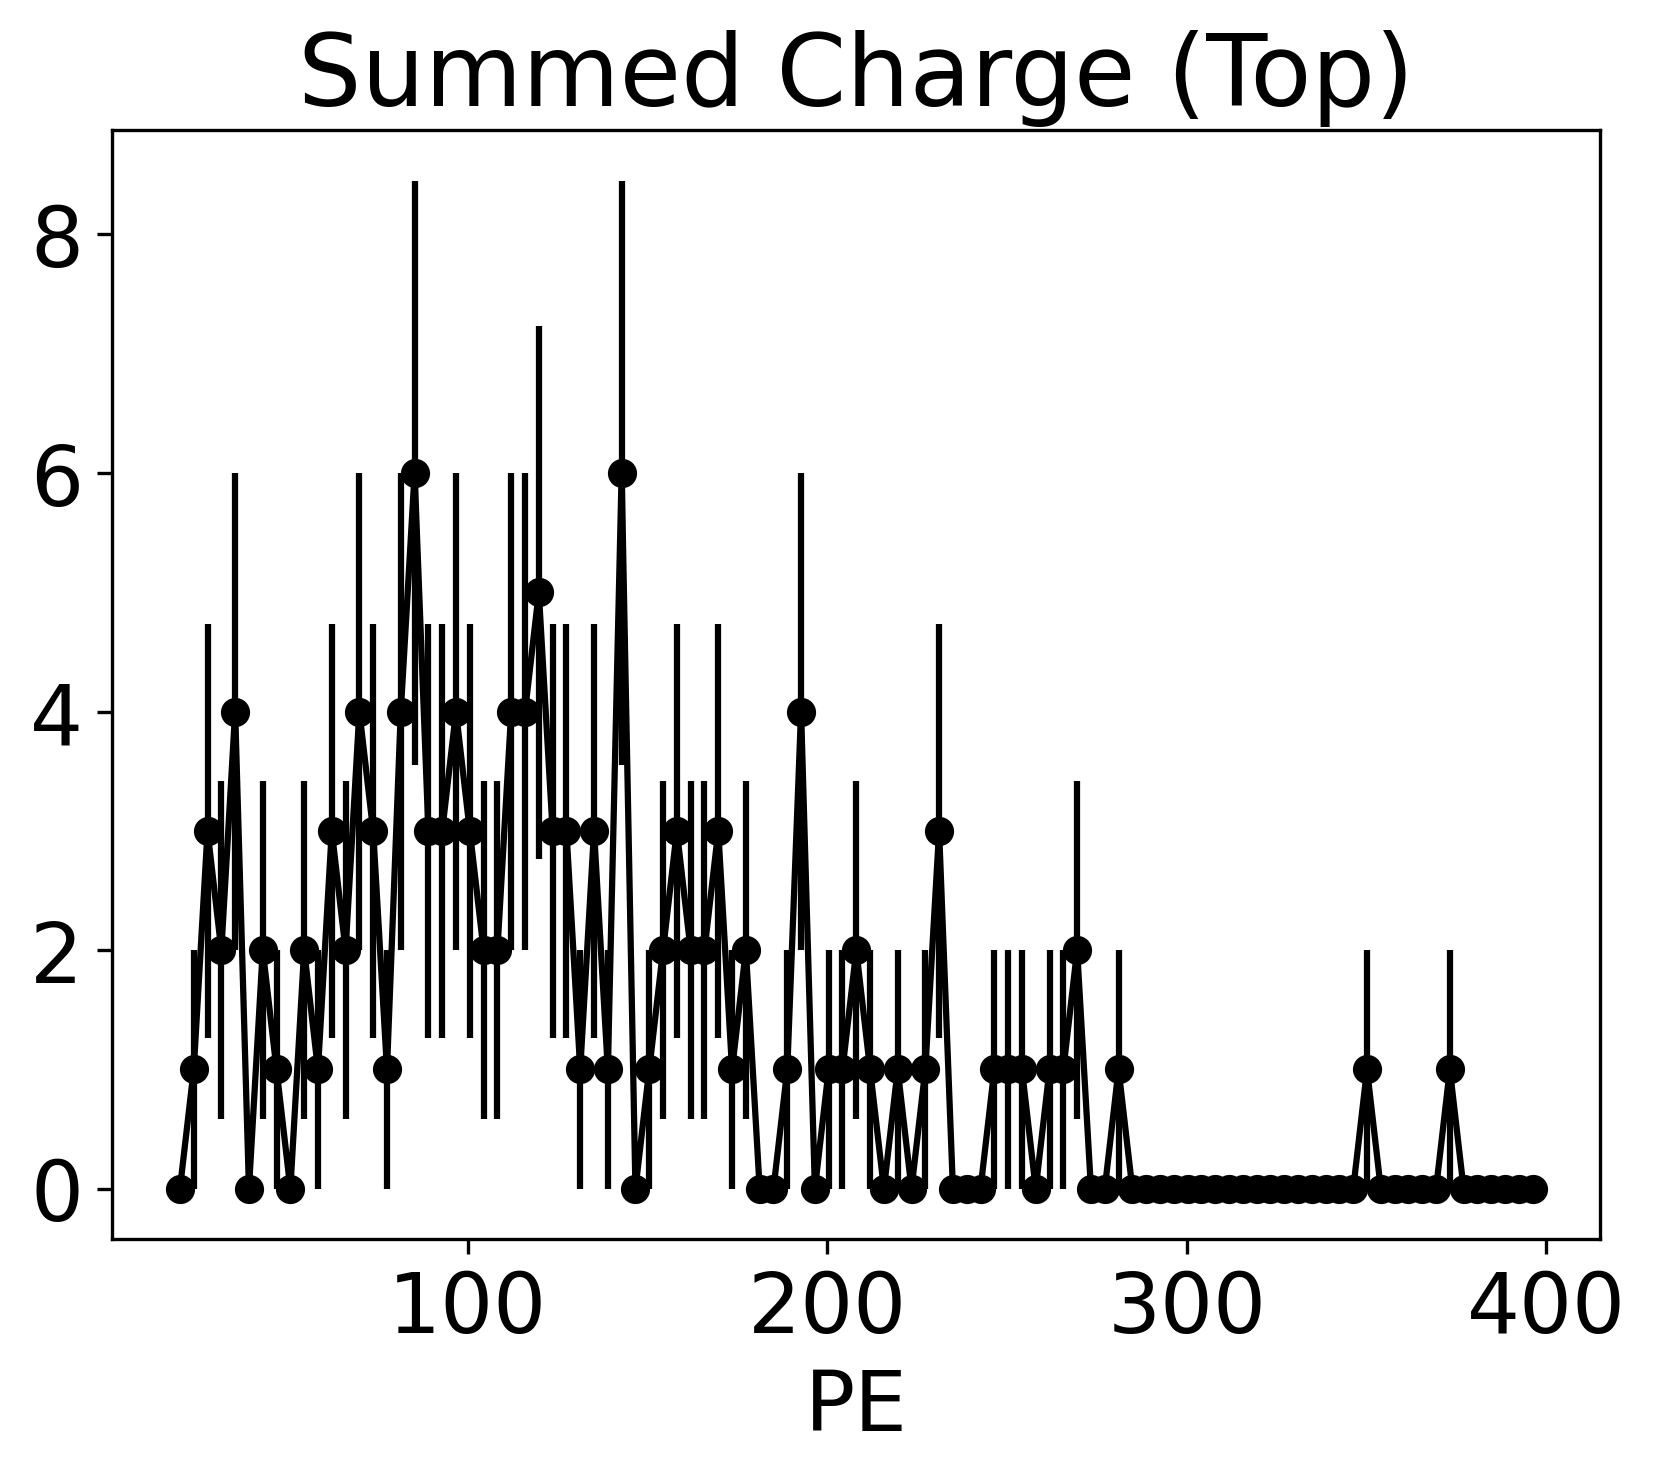

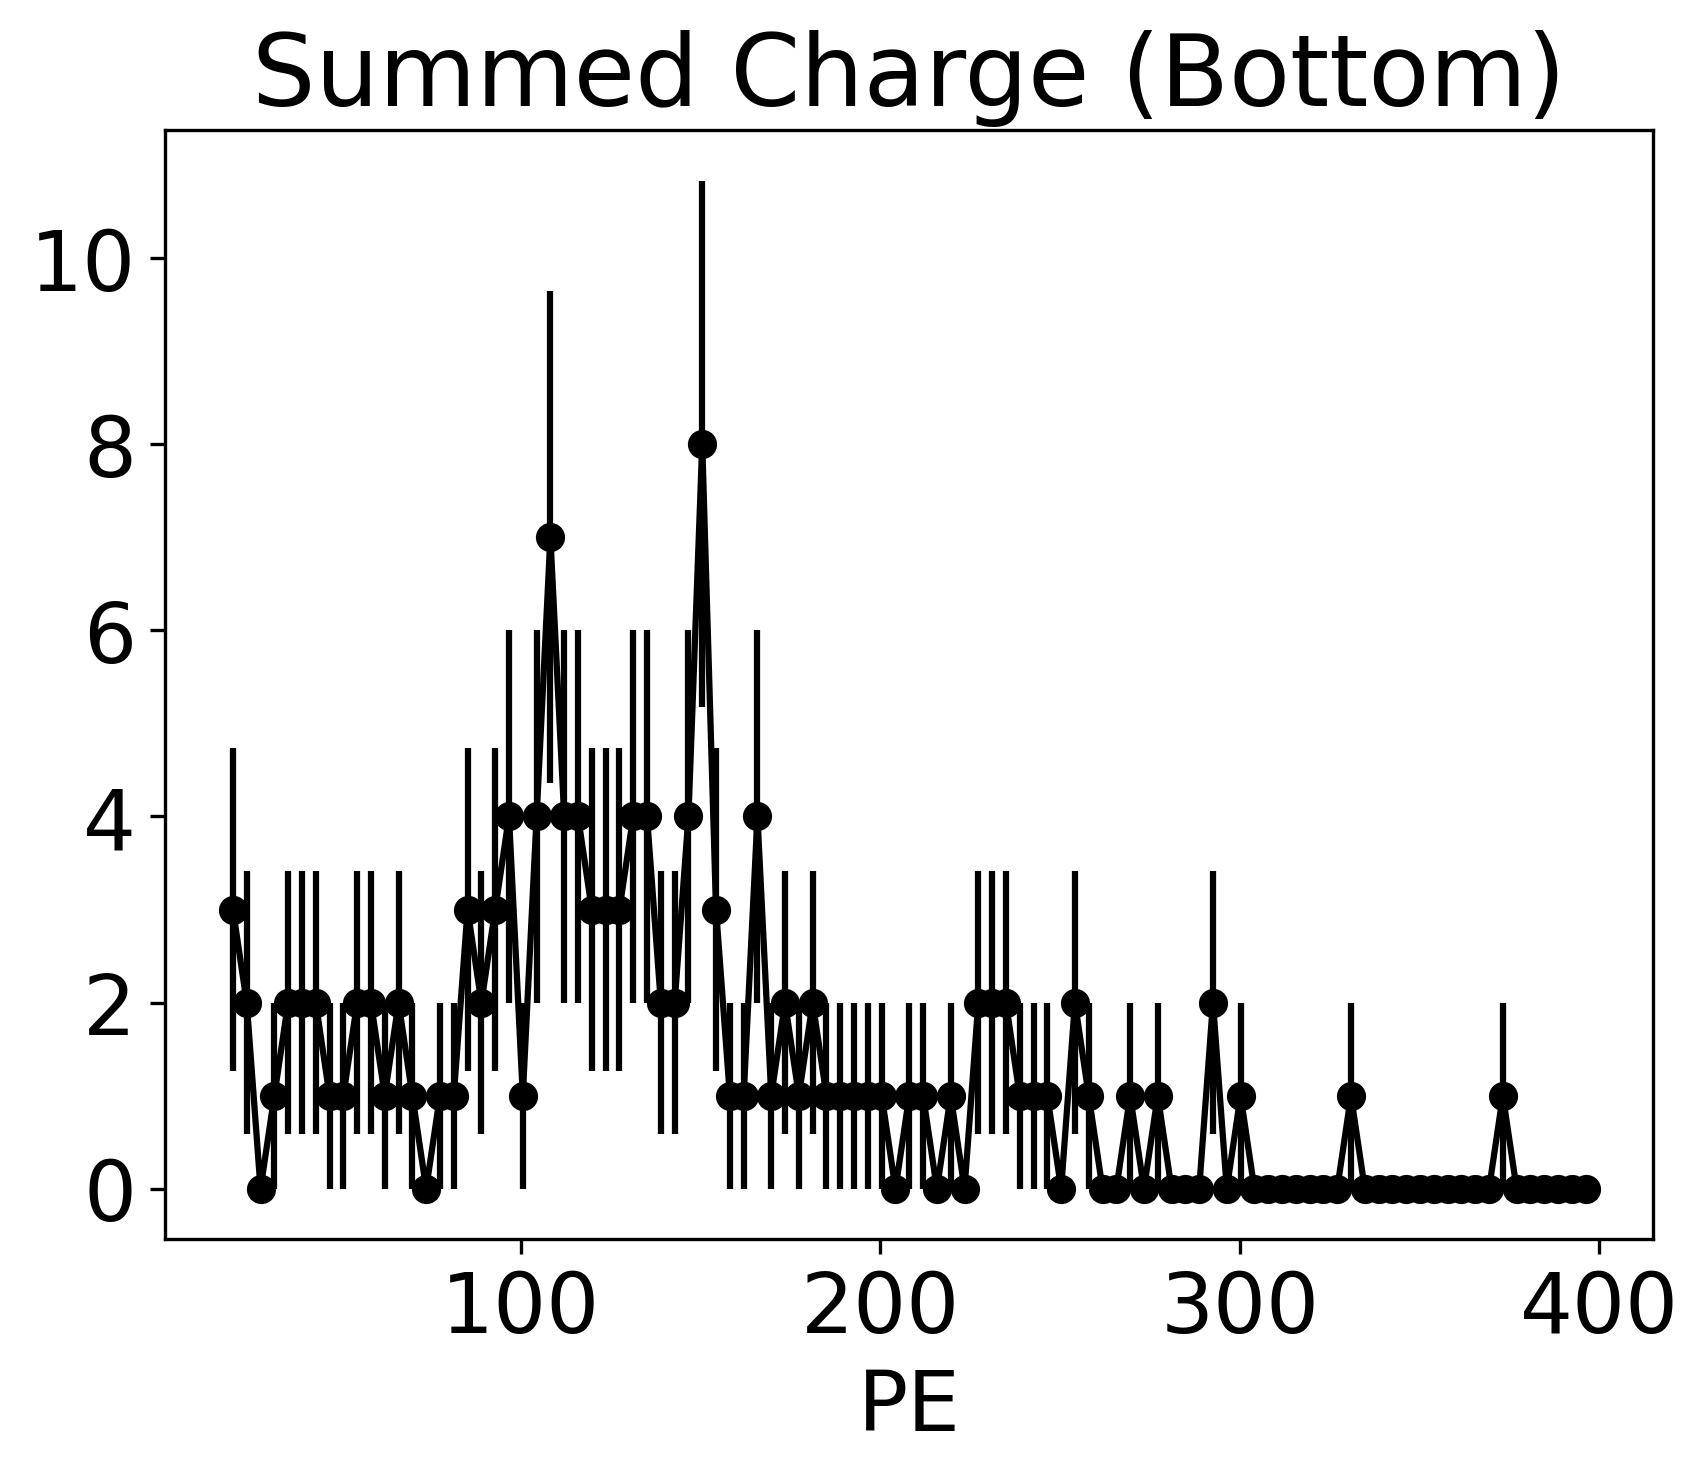

In [10]:

plot_charge_lanes(adc_split_array_external_trigger, threshold = 0, eight_channel = eight_channel, nsamples=nsamples, new_format = True, by_bunch_count=False, landau_fit= False, gain_list=gain_list, pedestal_list=pedestal_list, ror_length=nsamples, calc_pedestal=False, min_samp=0, max_samp=None)

In [11]:
channel_correlations(adc_split_array_external_trigger, df_full_conns_external_trigger_test, eight_channel = False, use_sum = True, nsamples = 64, by_bunch_count = False, new_format = True, ror_length = 64, gain_list = gain_list, pedestal_list = pedestal_list, min_samp = 30, max_samp = 50, calc_pedestal=True)

0 10
0 10
1.0000000000000002
0 10
1 8
0.8660344392288345
0 10
2 6
0.31040423845626014
0 10
3 4
0.15397427900400085
0 10
4 2
0.3333970837301984
0 10
5 0
0.08656354298596411
0 10
6 11
0.6934981661621561
0 10
7 9
0.5035713534536618
0 10
8 7
0.6703179418215294
0 10
9 5
0.30864334021010725
0 10
10 3
0.08684628002840467
0 10
11 1
0.18494844016515555
1 8
0 10
0.8660344392288345
1 8
1 8
1.0000000000000002
1 8
2 6
0.319219672262907
1 8
3 4
0.17305464930440234
1 8
4 2
0.27108318237456114
1 8
5 0
0.09198143109954011
1 8
6 11
0.582308336010358
1 8
7 9
0.44950151548407064
1 8
8 7
0.7962788956704805
1 8
9 5
0.3289157855227301
1 8
10 3
0.08761820223163057
1 8
11 1
0.13378560672930387
2 6
0 10
0.31040423845626014
2 6
1 8
0.319219672262907
2 6
2 6
1.0
2 6
3 4
0.28228993044955175
2 6
4 2
0.15320469999328046
2 6
5 0
0.05631893553842572
2 6
6 11
0.2600475140775419
2 6
7 9
0.48521723942973544
2 6
8 7
0.45510197525570795
2 6
9 5
0.2559661306189226
2 6
10 3
0.06171132534789111
2 6
11 1
0.08022798352448325
3 

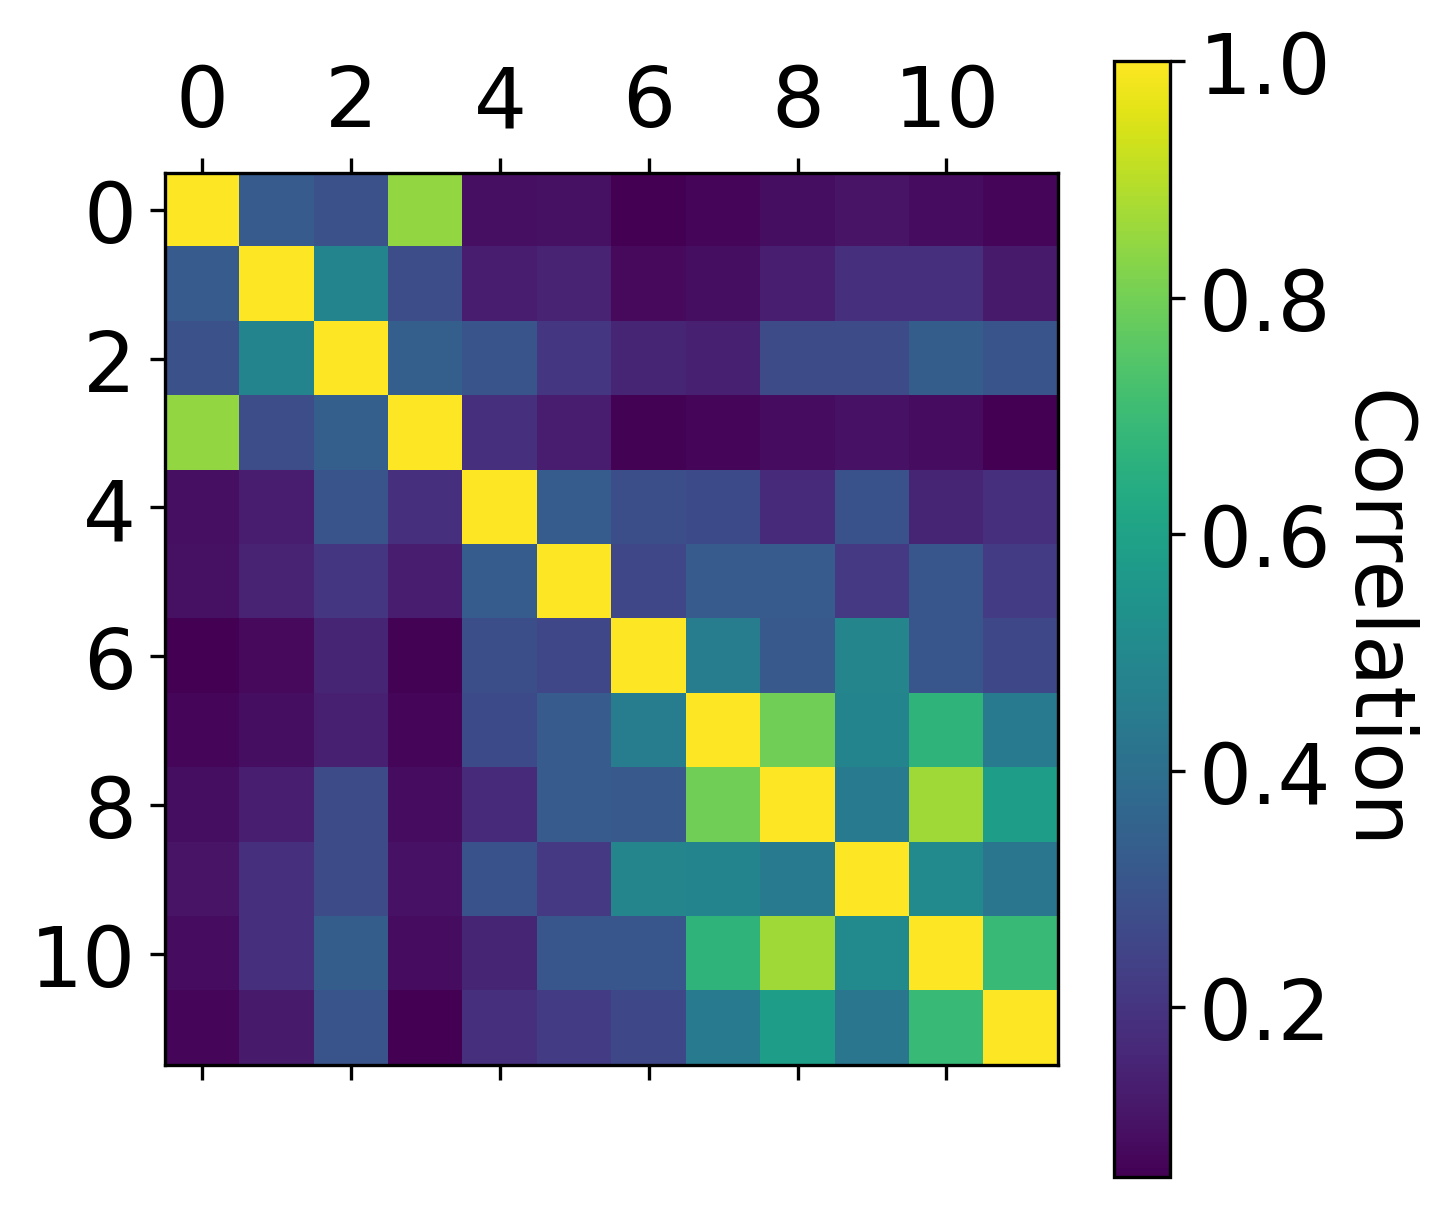

In [12]:
channel_covariances(adc_split_array_external_trigger, df_full_conns_external_trigger_test, eight_channel = eight_channel, conv_bar_id=True, use_sum = True, nsamples = nsamples, by_bunch_count = False, new_format = True, ror_length = nsamples, gain_list = gain_list, pedestal_list = pedestal_list, min_samp = 0, max_samp = None)

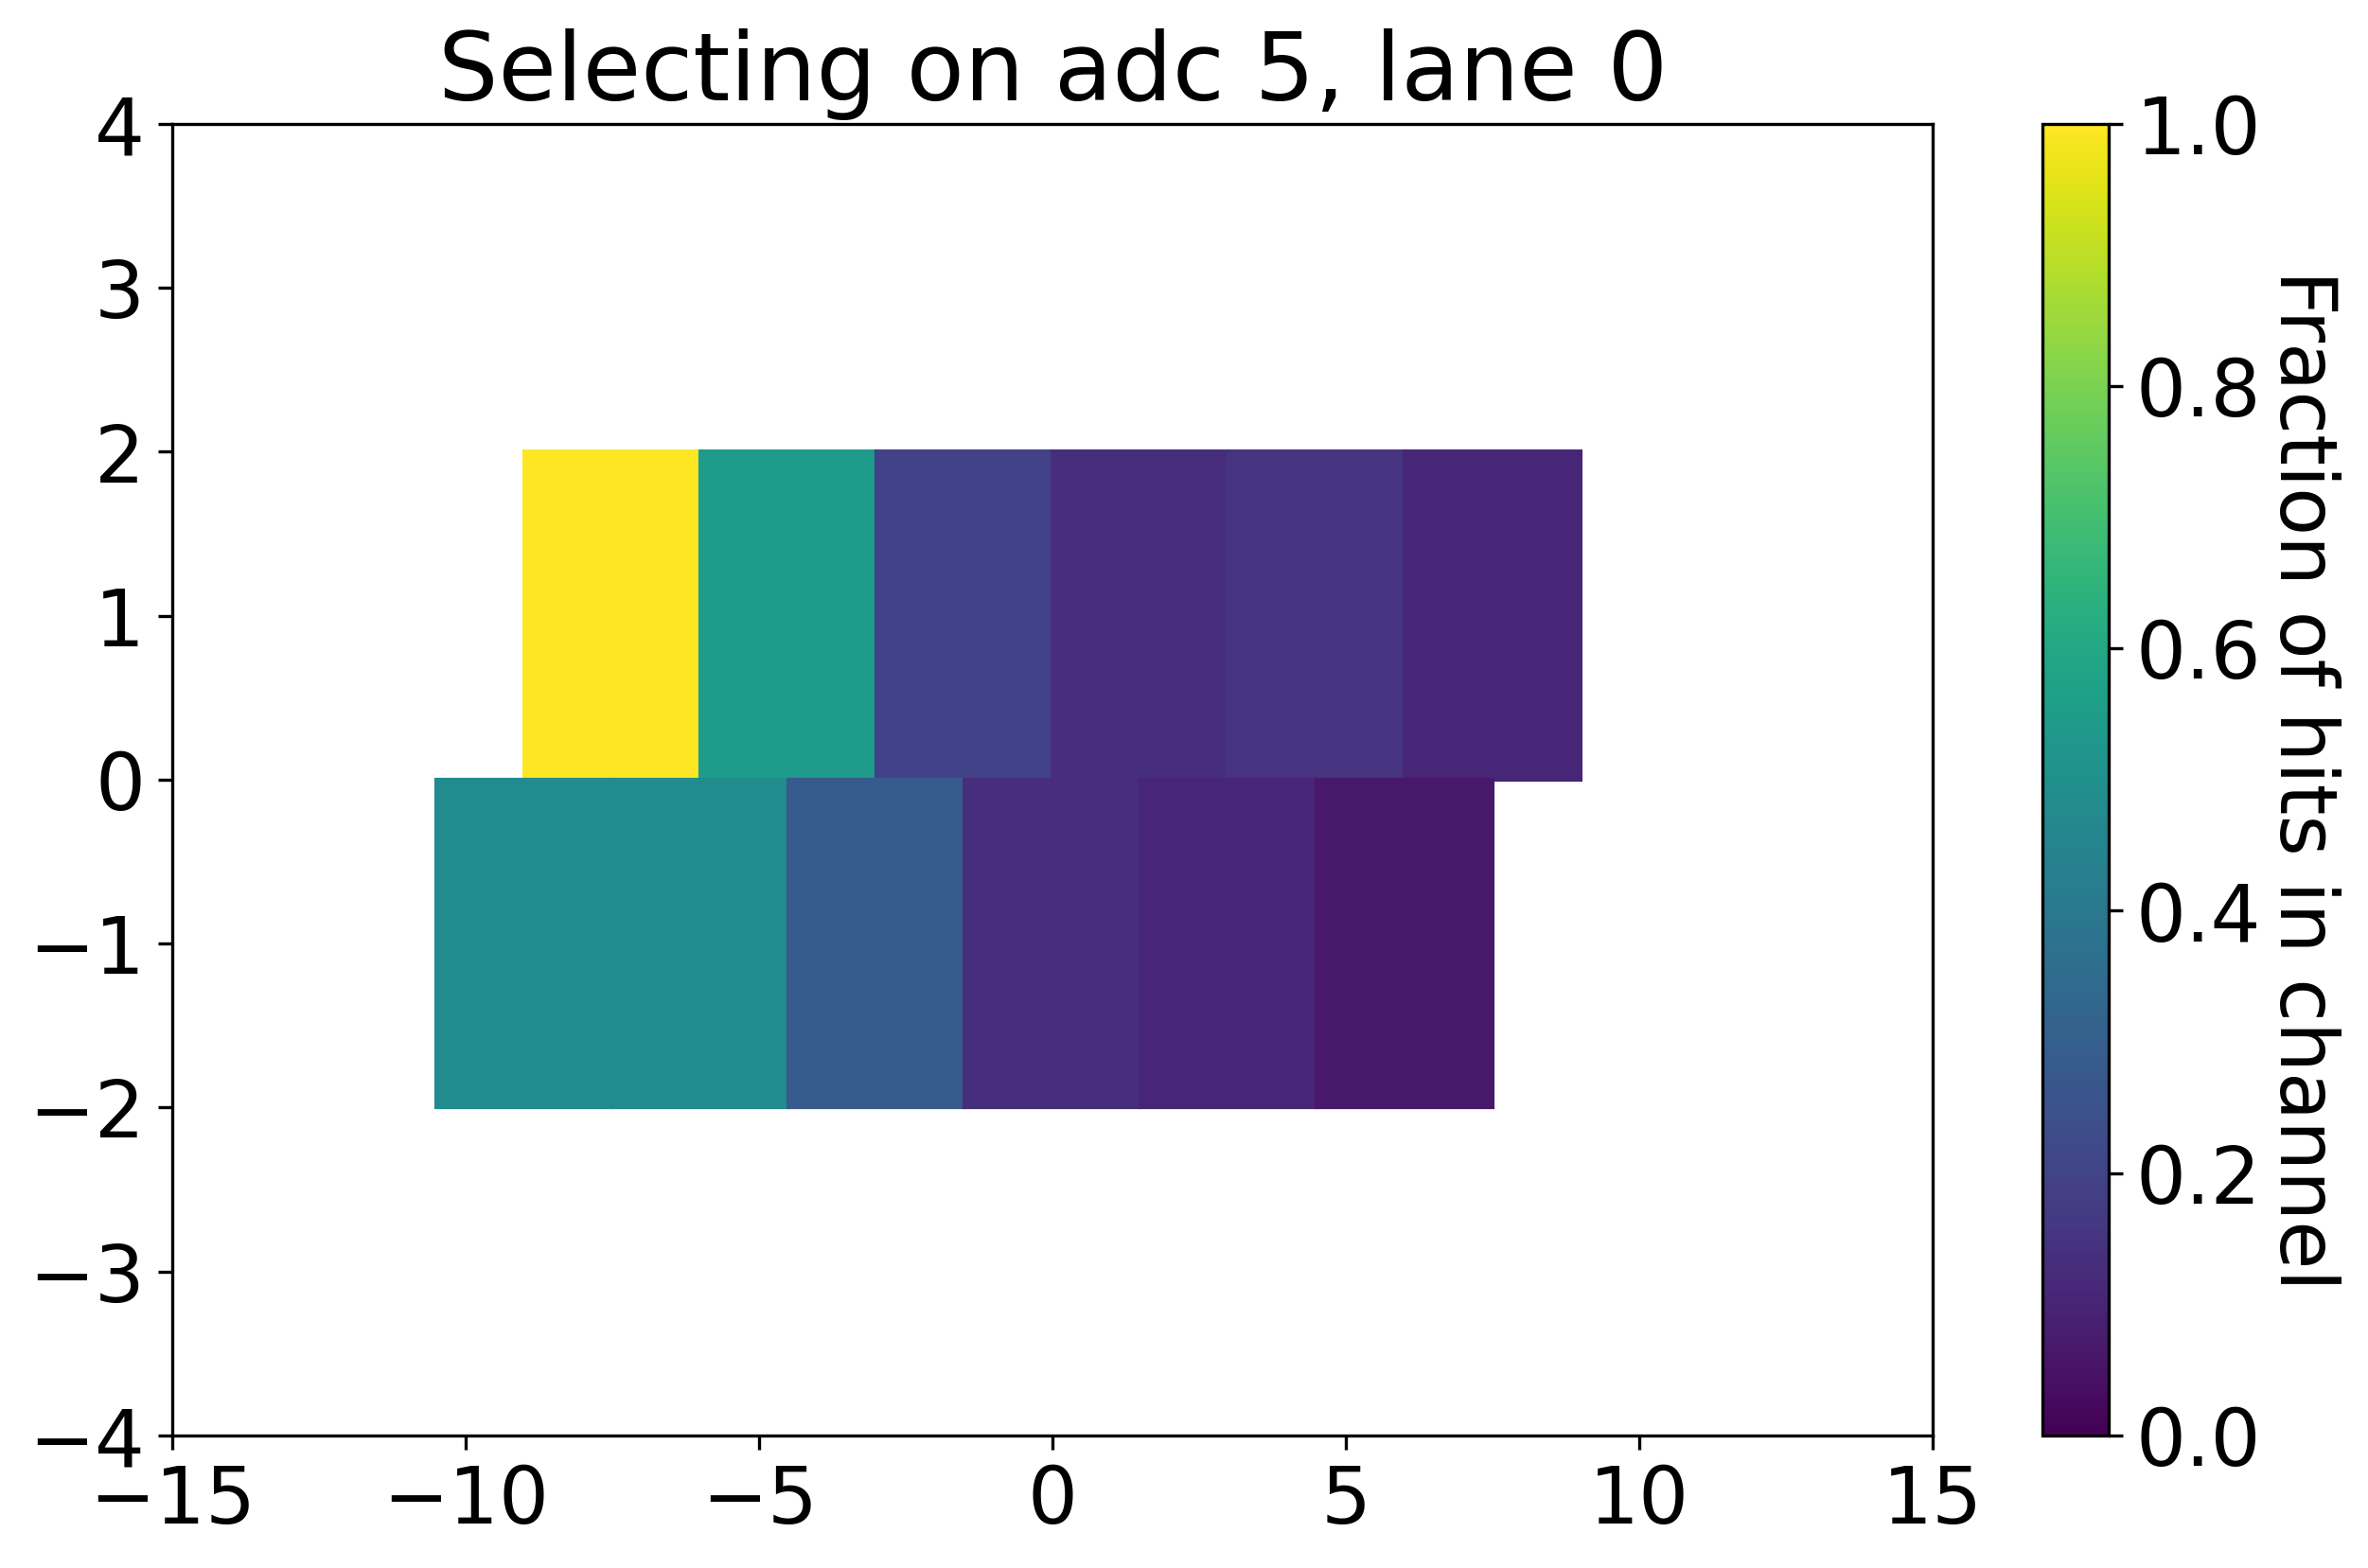

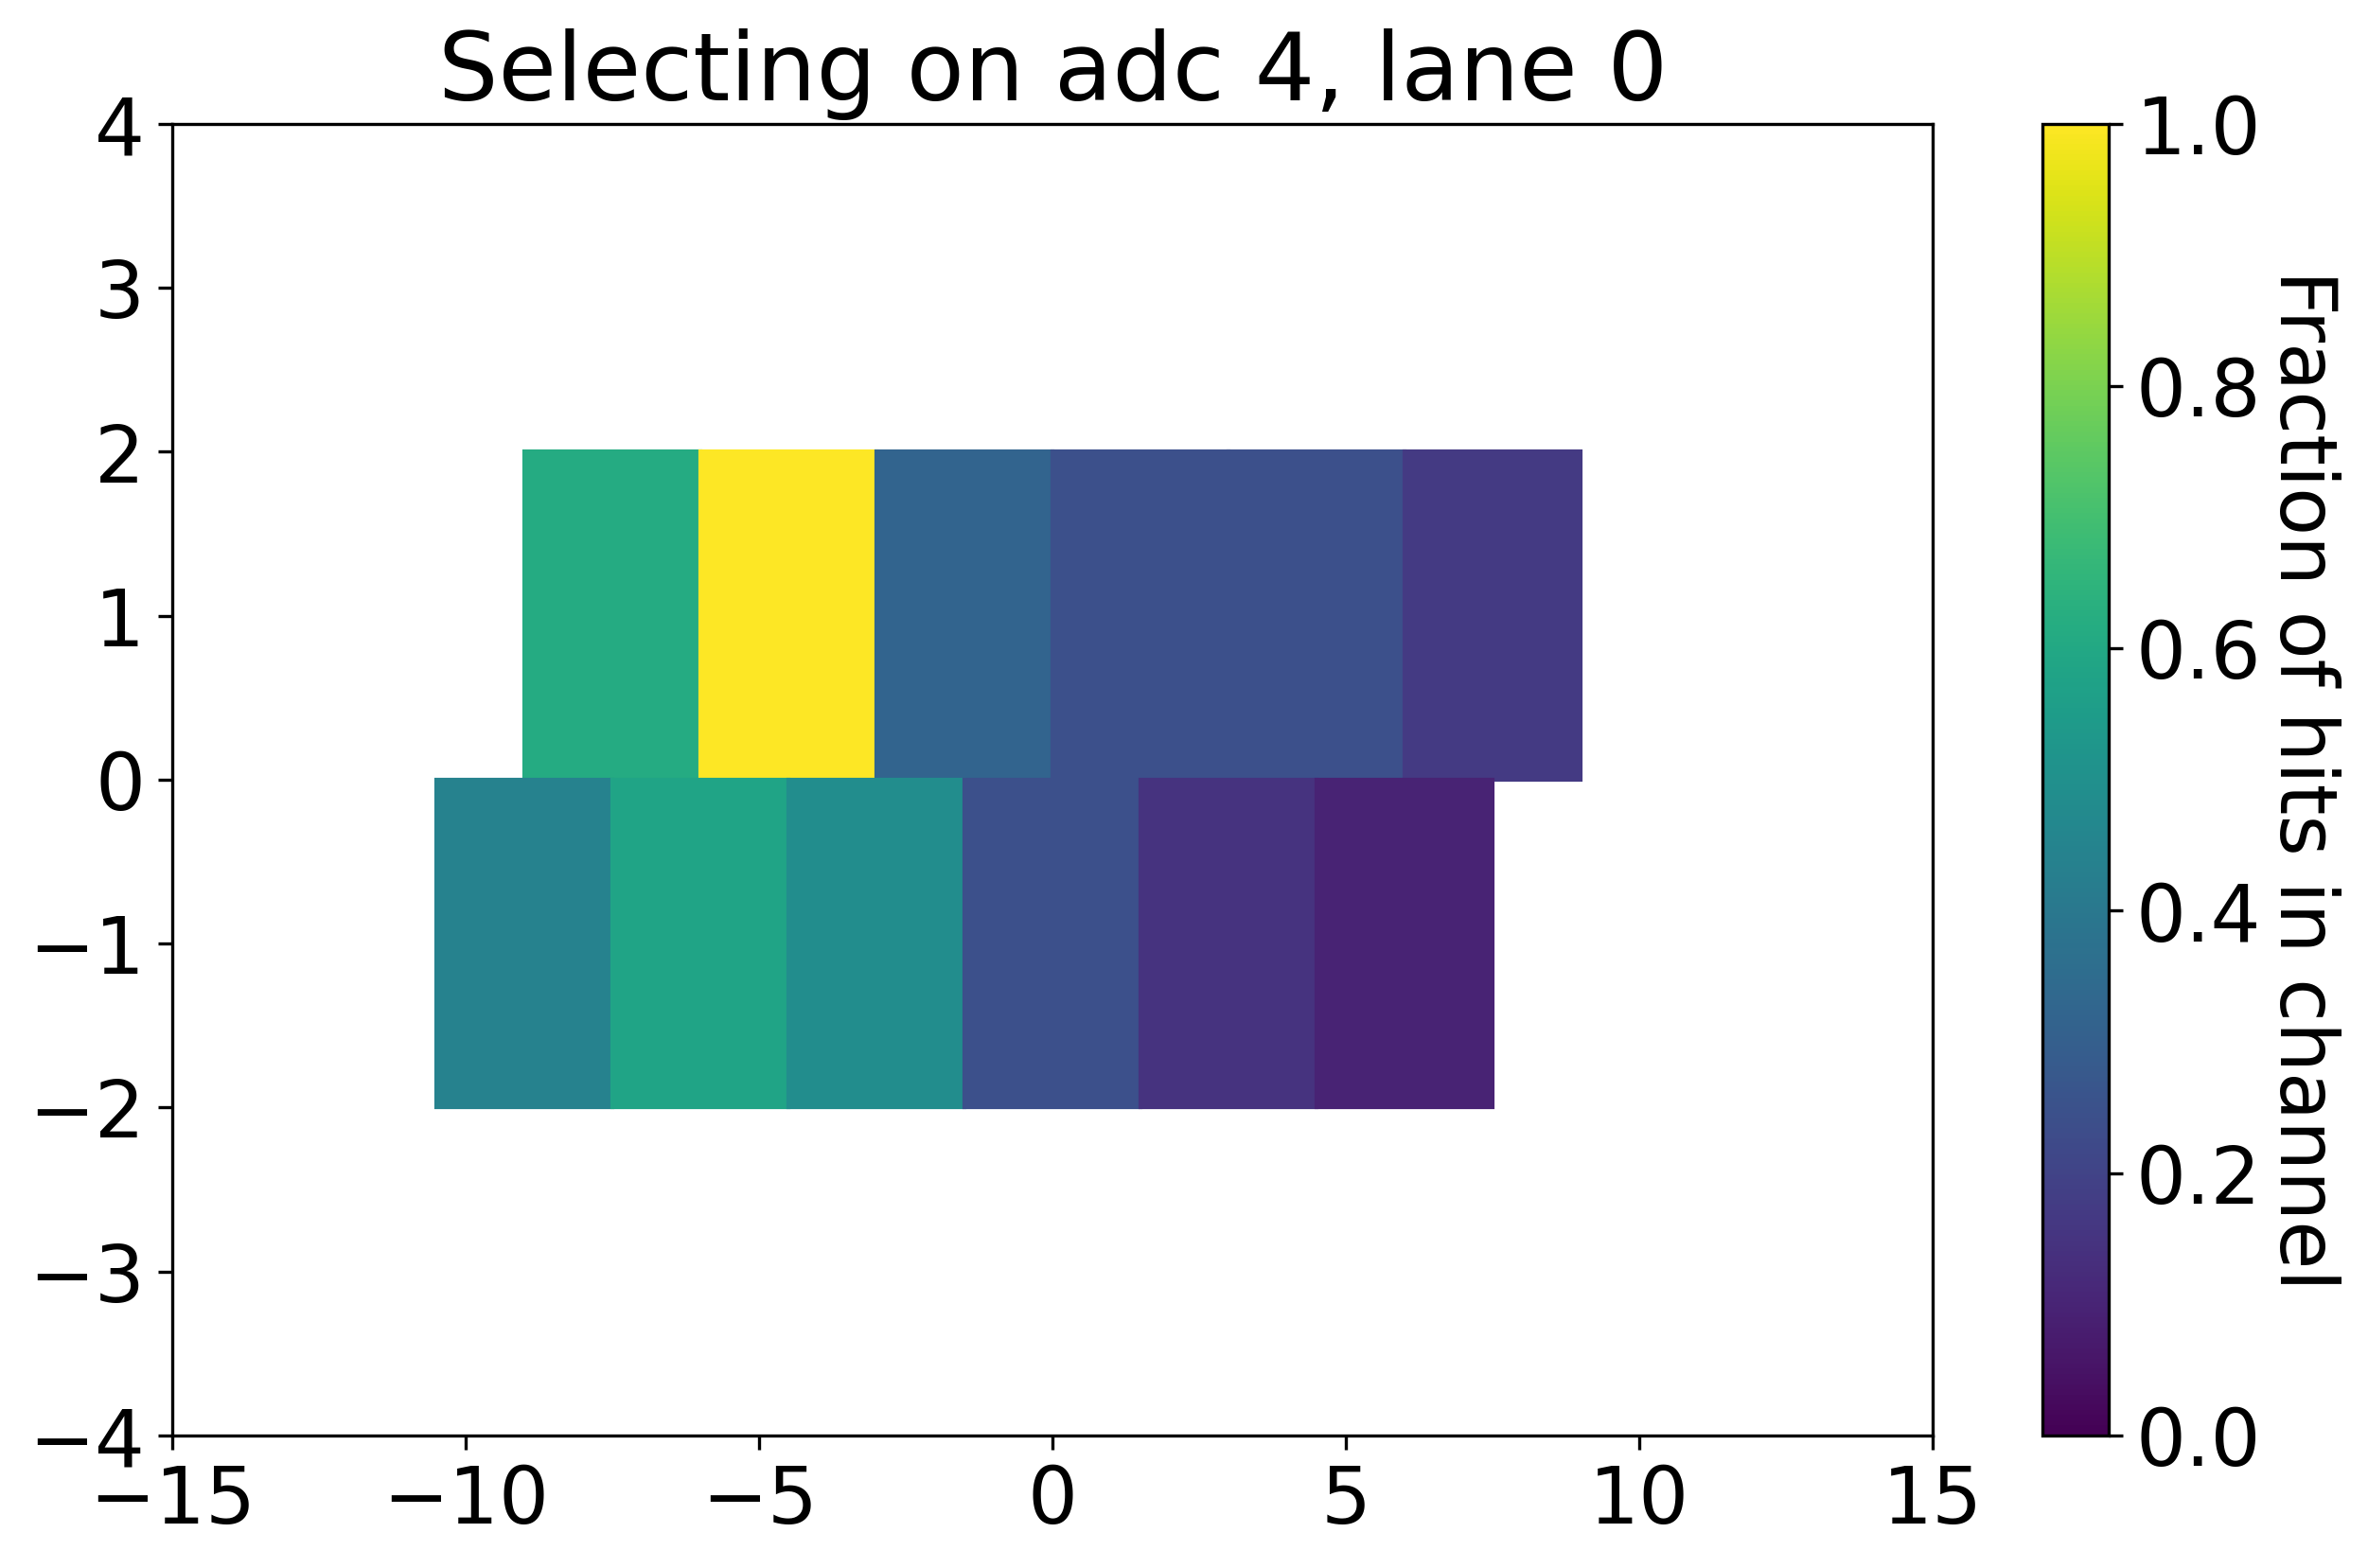

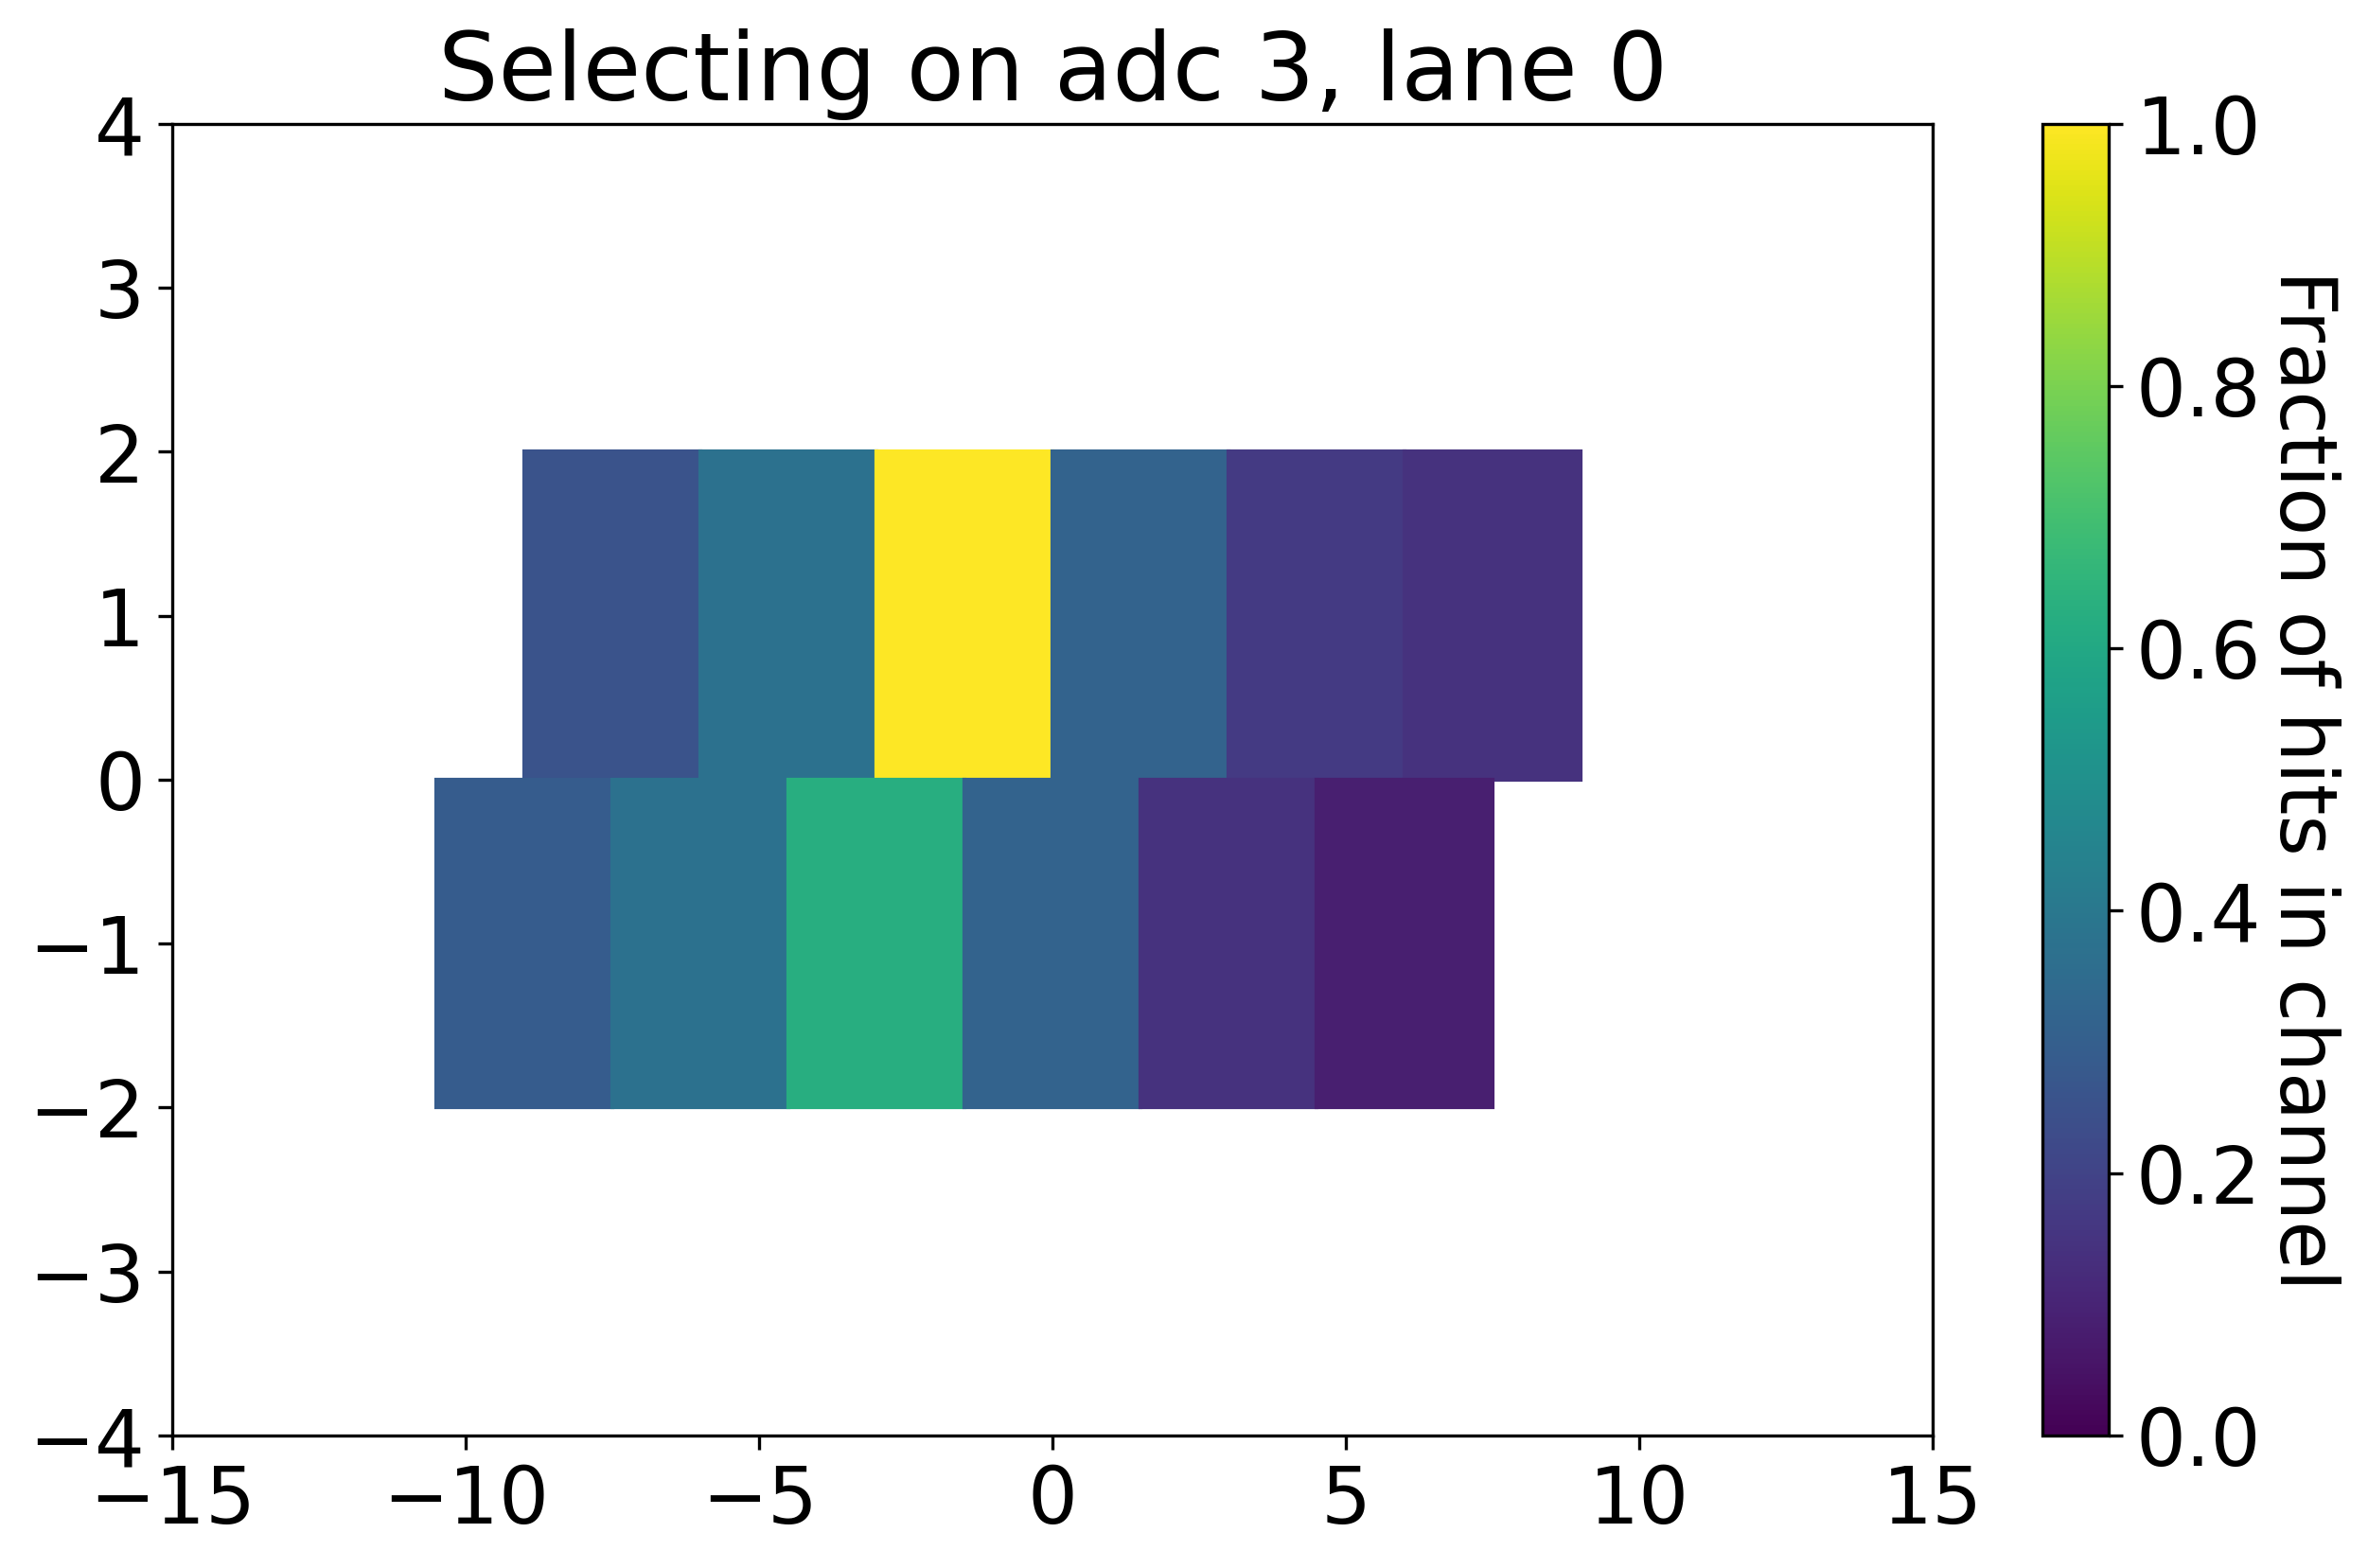

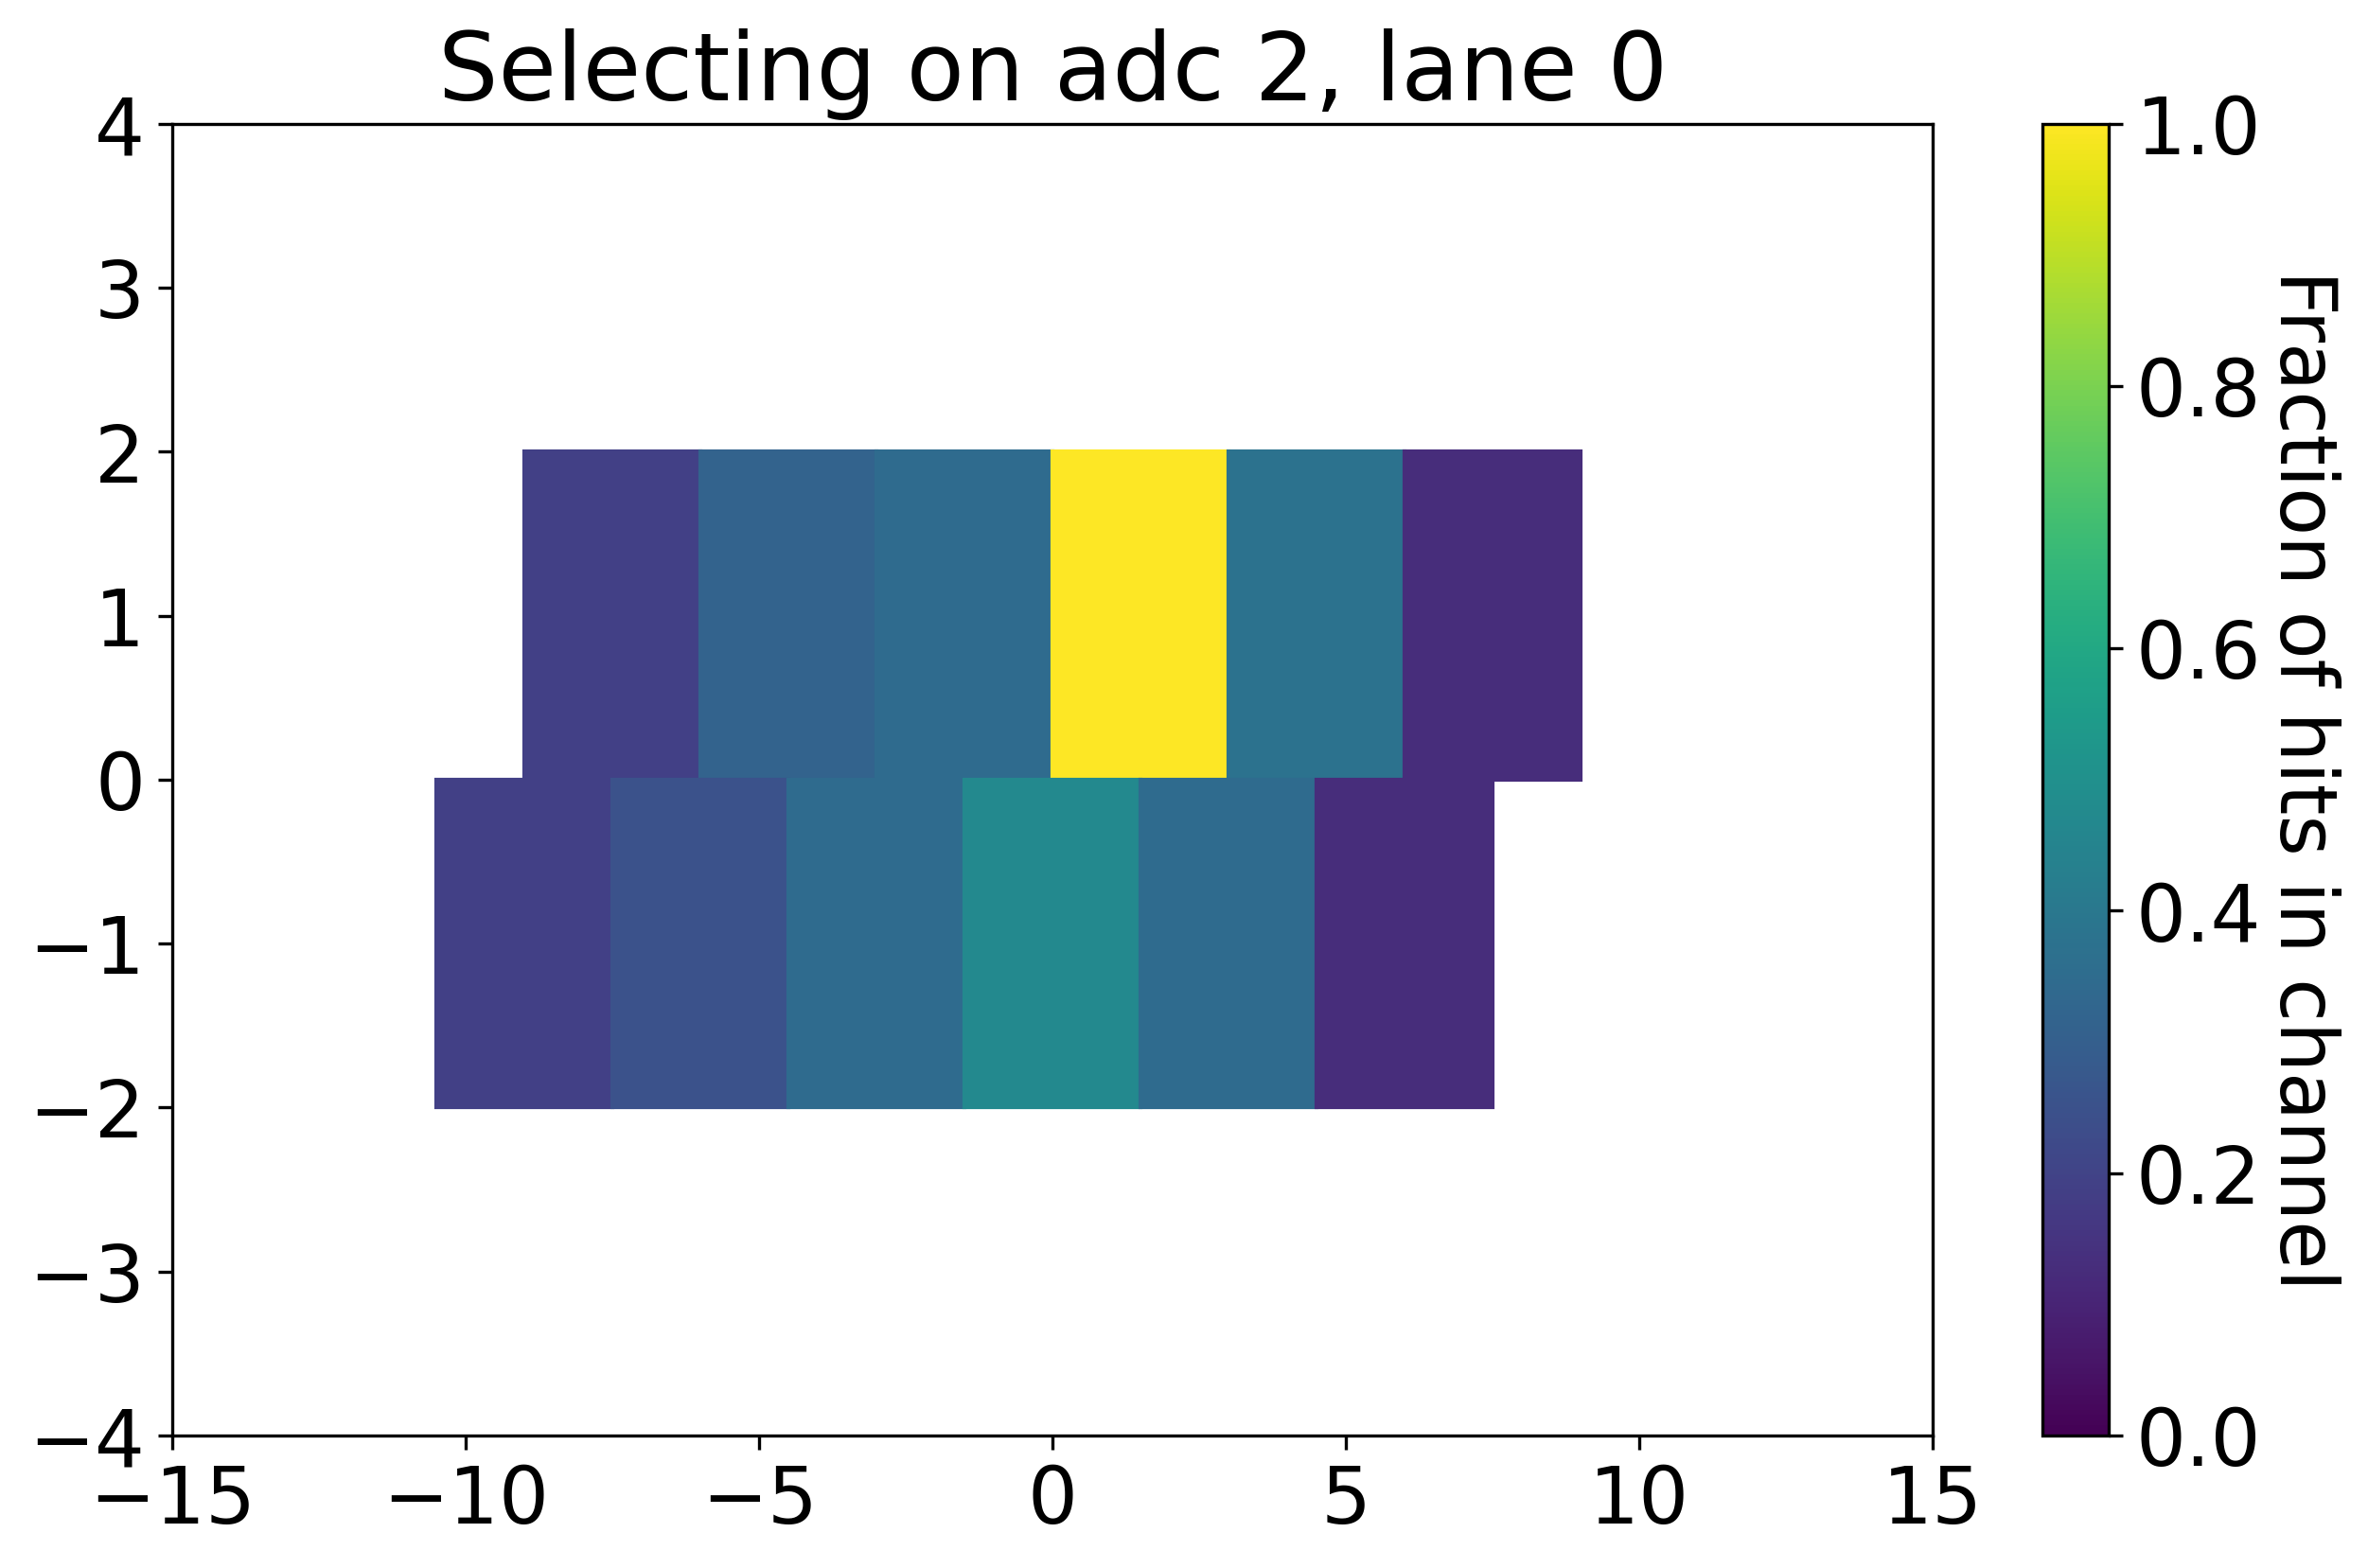

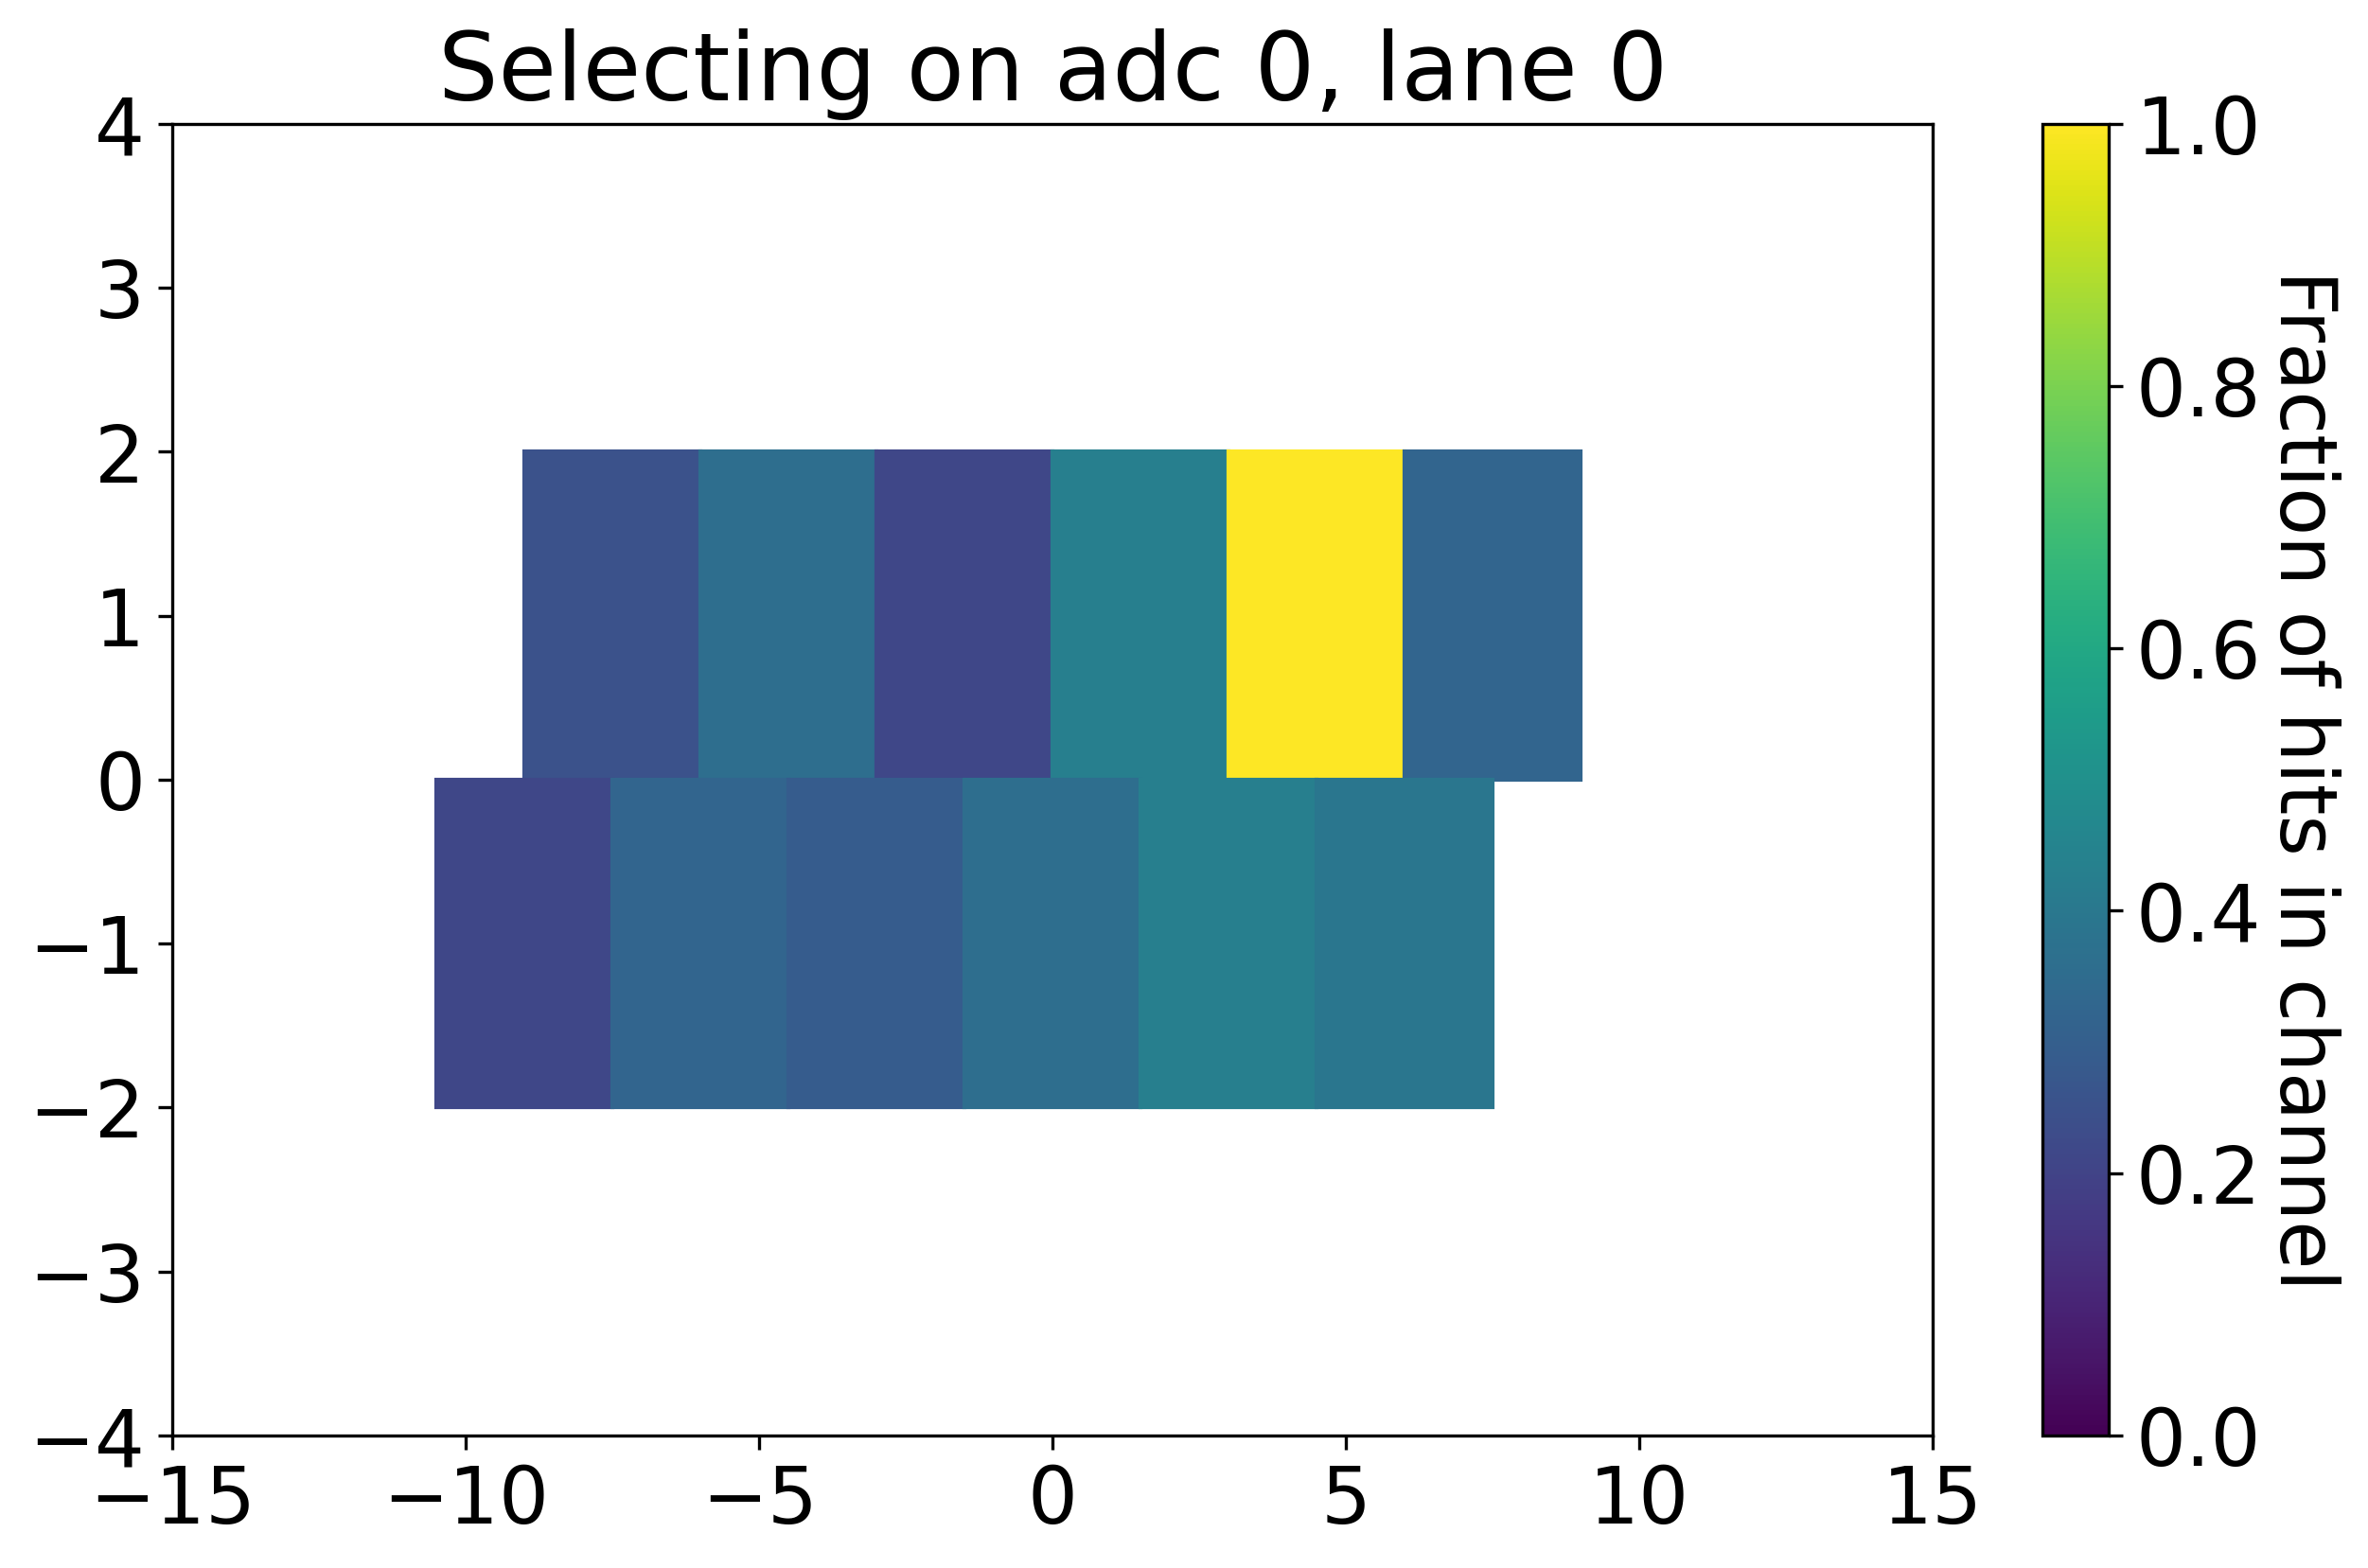

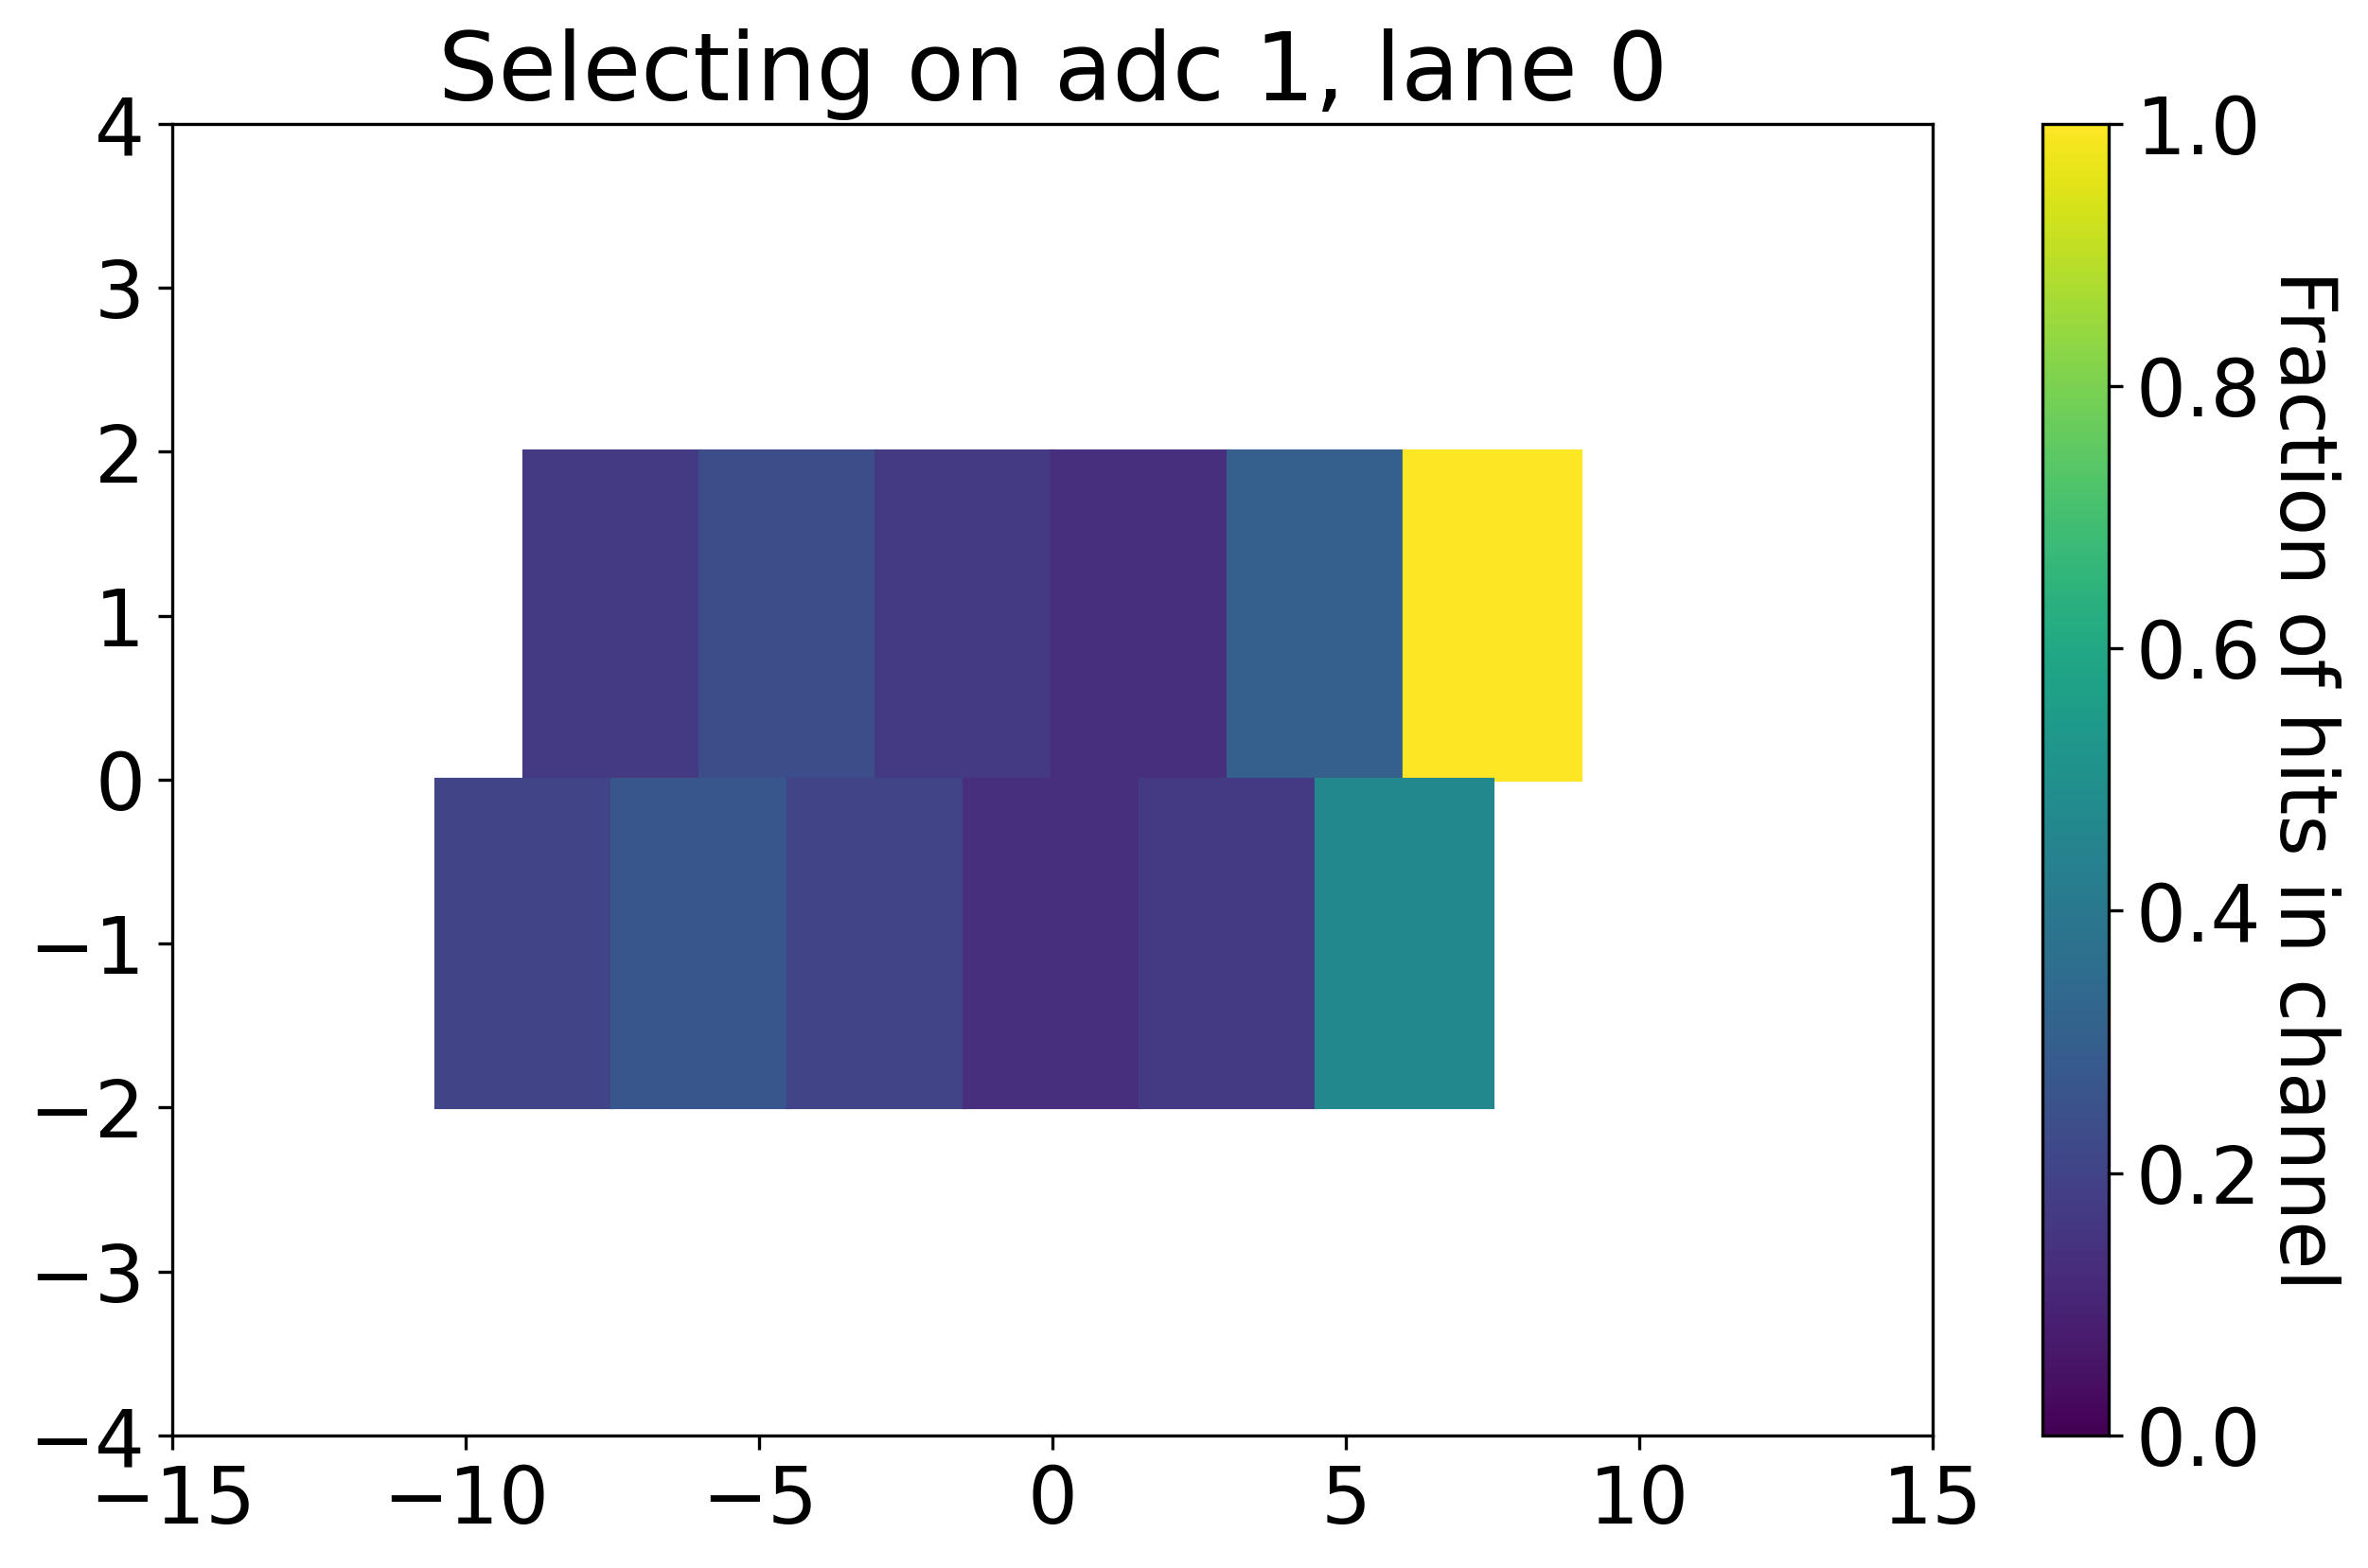

In [13]:
plot_hits_over_threshold_corr(adc_split_array_external_trigger, 30, eight_channel = eight_channel, nsamples=nsamples)